In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

# Suppress warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv("loan_1.csv",low_memory=False)
#data.info()
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,Unnamed: 111
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
#Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
#Printing columns which have all null values
null_perc[null_perc ==100 ]

mths_since_last_major_derog       100.0
annual_inc_joint                  100.0
dti_joint                         100.0
verification_status_joint         100.0
tot_coll_amt                      100.0
tot_cur_bal                       100.0
open_acc_6m                       100.0
open_il_6m                        100.0
open_il_12m                       100.0
open_il_24m                       100.0
mths_since_rcnt_il                100.0
total_bal_il                      100.0
il_util                           100.0
open_rv_12m                       100.0
open_rv_24m                       100.0
max_bal_bc                        100.0
all_util                          100.0
total_rev_hi_lim                  100.0
inq_fi                            100.0
total_cu_tl                       100.0
inq_last_12m                      100.0
acc_open_past_24mths              100.0
avg_cur_bal                       100.0
bc_open_to_buy                    100.0
bc_util                           100.0


In [4]:
#taking columns that have not numm data
imp_data = data[["id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","chargeoff_within_12_mths","pub_rec_bankruptcies","tax_liens"]]

In [5]:
imp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [6]:
#Finding number of unique values in each vcolumn
imp_data.nunique().sort_values().head(50)

tax_liens                         1
chargeoff_within_12_mths          1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
next_pymnt_d                      2
term                              2
loan_status                       3
verification_status               3
pub_rec_bankruptcies              3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                    101
last_credit_pull_d              106
mths_since_last_record          111
int_rate                        371
earliest_cr_line            

In [7]:
# drop columns with only one value
imp_data.drop(["tax_liens","chargeoff_within_12_mths","collections_12_mths_ex_med","pymnt_plan","initial_list_status"], axis=1, inplace=True)
imp_data.nunique().sort_values().head(50)

next_pymnt_d                   2
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 5
pub_rec                        5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
mths_since_last_delinq        95
last_pymnt_d                 101
last_credit_pull_d           106
mths_since_last_record       111
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_late_fee          1356
collection

In [8]:
#Finding percentage of null or missing values
null_perc = round(100*(imp_data.isnull().sum()/len(imp_data.index)), 2)
null_perc[ null_perc > 0 ]

emp_title                  6.19
emp_length                 2.71
desc                      32.59
title                      0.03
mths_since_last_delinq    64.66
mths_since_last_record    92.99
revol_util                 0.13
last_pymnt_d               0.18
next_pymnt_d              97.13
last_credit_pull_d         0.01
pub_rec_bankruptcies       1.75
dtype: float64

In [9]:
imp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [10]:
#lets check if annula_inc has outliner values
imp_data["annual_inc"].value_counts()

annual_inc
60000.0    1505
50000.0    1057
40000.0     876
45000.0     830
30000.0     825
           ... 
56820.0       1
45314.0       1
53913.0       1
62880.0       1
27376.0       1
Name: count, Length: 5318, dtype: int64

In [11]:
# remove all lows that has values with max count 5
counts = imp_data['annual_inc'].value_counts()
imp_data = imp_data[~imp_data['annual_inc'].isin(counts[counts < 5].index)]

In [12]:
#change datat ype of in_rate to float and remvoe the trailing %
imp_data['int_rate'] = imp_data.apply(lambda x: pd.to_numeric(x.int_rate[:-2]),axis=1)

In [13]:
#change the datatype to int and remove the trailing "months"
imp_data['term'] = imp_data.apply(lambda x: pd.to_numeric(x.term[:3]),axis=1)

In [14]:
# get the months and year columns of issue data
imp_data["issue_month"] = pd.to_datetime(imp_data["issue_d"], format='%b-%y').dt.month
imp_data["issue_year"] = pd.to_datetime(imp_data["issue_d"], format='%b-%y').dt.year

In [15]:
# Converting the column issue_d from string object to DateTime
imp_data['issue_d'] = pd.to_datetime(imp_data['issue_d'], format='%b-%y')

In [16]:
imp_data["loan_amnt"].value_counts()

loan_amnt
10000    2463
12000    2022
5000     1752
6000     1636
15000    1614
         ... 
20300       1
8175        1
8625        1
17175       1
2675        1
Name: count, Length: 838, dtype: int64

In [17]:
# Round off the values of key float fields to 2 decimal place
# all int_rate and dti already limited to 2 edcimal
print("Rounding columns to 2 decimal places")
for c in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    print(c)
    imp_data[c] = imp_data[c].apply(lambda x: round(x,2))

Rounding columns to 2 decimal places
loan_amnt
funded_amnt
funded_amnt_inv
int_rate
dti


In [18]:
imp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33659 entries, 0 to 39716
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       33659 non-null  int64         
 1   member_id                33659 non-null  int64         
 2   loan_amnt                33659 non-null  int64         
 3   funded_amnt              33659 non-null  int64         
 4   funded_amnt_inv          33659 non-null  float64       
 5   term                     33659 non-null  int64         
 6   int_rate                 33659 non-null  float64       
 7   installment              33659 non-null  float64       
 8   grade                    33659 non-null  object        
 9   sub_grade                33659 non-null  object        
 10  emp_title                31641 non-null  object        
 11  emp_length               32891 non-null  object        
 12  home_ownership           33659 non-nu

In [19]:
# Dropping the rwos early as, dropping all Currrent rows introduces NA columns which can be easily dropped
imp_data = imp_data[imp_data['loan_status'] != "Current"]

In [20]:
# check the columns that are unique
if len(imp_data) == len(imp_data["id"].unique()):
    print("id column is unique")
else:
    print("id column is not unique")

if len(imp_data) == len(imp_data["member_id"].unique()):
    print("member_id column is unique")
else:
    print("member_id column is not unique")

id column is unique
member_id column is unique


In [21]:
# drop text columns that may not be useful in the analysis
imp_data.drop(["url","desc", "emp_title","title"],axis=1,inplace=True)

In [22]:
# Converting emp_length to integer values
# Converting emp_length as numerical data to create more effective statistical analysis as compared to nominal values
imp_data['emp_length'] = imp_data['emp_length'].replace({'< 1 year': 0, '2 years': 2, '3 years': 3, 
                                                         '7 years': 7, '4 years': 4, '5 years': 5, 
                                                         '1 year': 1, '6 years': 6, '8 years': 8, 
                                                         '9 years': 9,  '10+ years': 10})


In [23]:
# Drop rows with empty values in this scenario
# Since the percent of rows is very small, dropping the rows instead of imputing them
imp_data = imp_data[imp_data['emp_length'].notna()]
imp_data = imp_data[imp_data['pub_rec_bankruptcies'].notna()]

In [24]:
# Bucketting Months to quarters
def bucket_issue_m(column):
    if column < 4:
        return 'Q1' 
    elif (column >= 4) and (column < 7):
        return 'Q2'      
    elif (column >= 7) and (column < 9):
        return 'Q3'  
    else:
        return 'Q4' # 75% quartile
    
imp_data['issue_q'] = imp_data.apply(lambda x : bucket_issue_m(x['issue_month']), axis = 1)

In [25]:
# Bucketing dti
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'    
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile
    
imp_data['dti_b'] = imp_data.apply(lambda x : bucket_dti(x.dti), axis = 1)

In [26]:
# Bucketting Loan Amount
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'      
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'  
    else:
        return '15K - above' # 75% quartile
    
imp_data['loan_amnt_b'] = imp_data.apply(lambda x : bucket_loan_amnt(x['loan_amnt']), axis = 1)

In [27]:
# Bucketing Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'    
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

imp_data['annual_inc_b'] = imp_data.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

In [28]:
# Bucketing interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'    
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile
    
imp_data['int_rate_b'] = imp_data.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

In [29]:
# Bucketting Funded Amount
def bucket_funded_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'      
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'  
    else:
        return '15K - above' # 75% quartile
    
imp_data['funded_amnt_b'] = imp_data.apply(lambda x : bucket_funded_amnt(x['funded_amnt']), axis = 1)

In [30]:
# Bucketting Funded Amount
def bucket_funded_amnt_inv(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'      
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'  
    else:
        return '15K - above' # 75% quartile
    
imp_data['funded_amnt_inv_b'] = imp_data.apply(lambda x : bucket_funded_amnt_inv(x['funded_amnt_inv']), axis = 1)

**Univariate Analysis**

In [31]:
# Column metadata used by functions below
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annuap Income', 
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}

In [32]:
##Univariate Annalysis
def univariate_analysis(df, column):
    fig, p = plt.subplots(1,2, figsize=(16, 4))
    sn.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sn.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plt.tight_layout()
    plt.show()

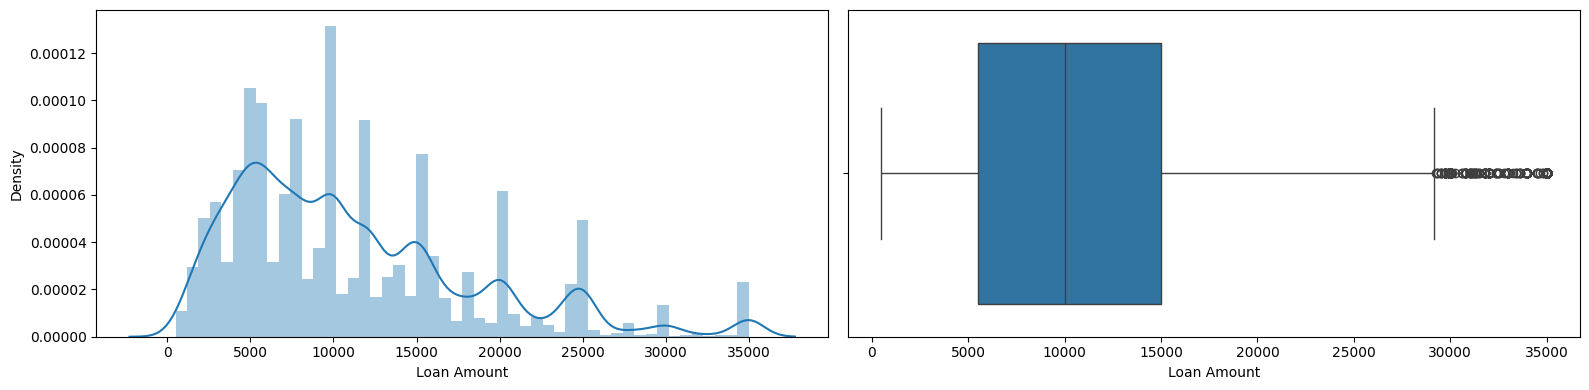

In [33]:
#Univariate Analysis for Load Amount
univariate_analysis(imp_data,'loan_amnt')

**Most of the loan amounts are between 5K to 15 K**

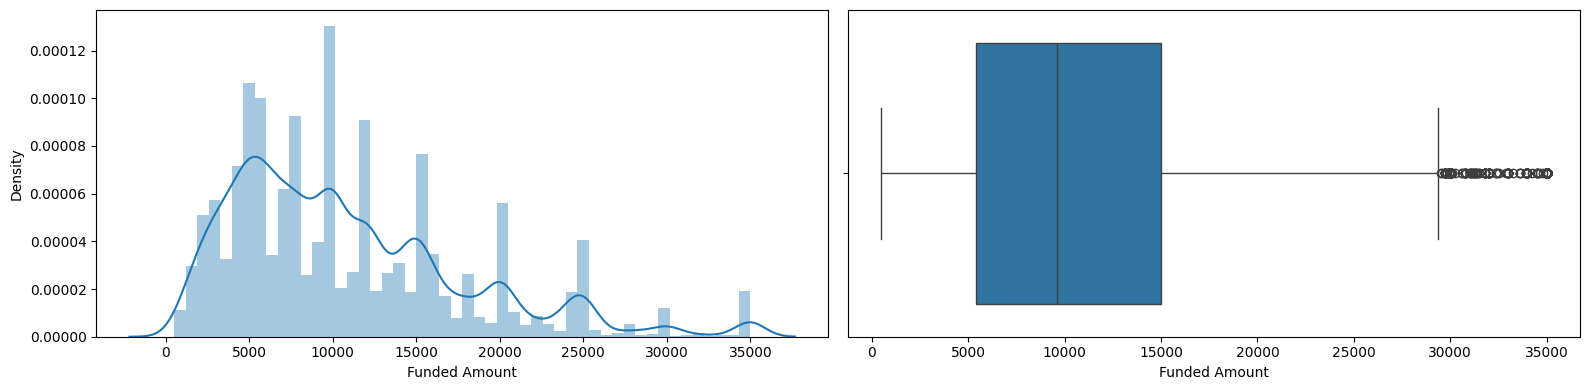

In [34]:
univariate_analysis(imp_data, 'funded_amnt')

**Most of the loan funded amounts are between 5K to 15 K**

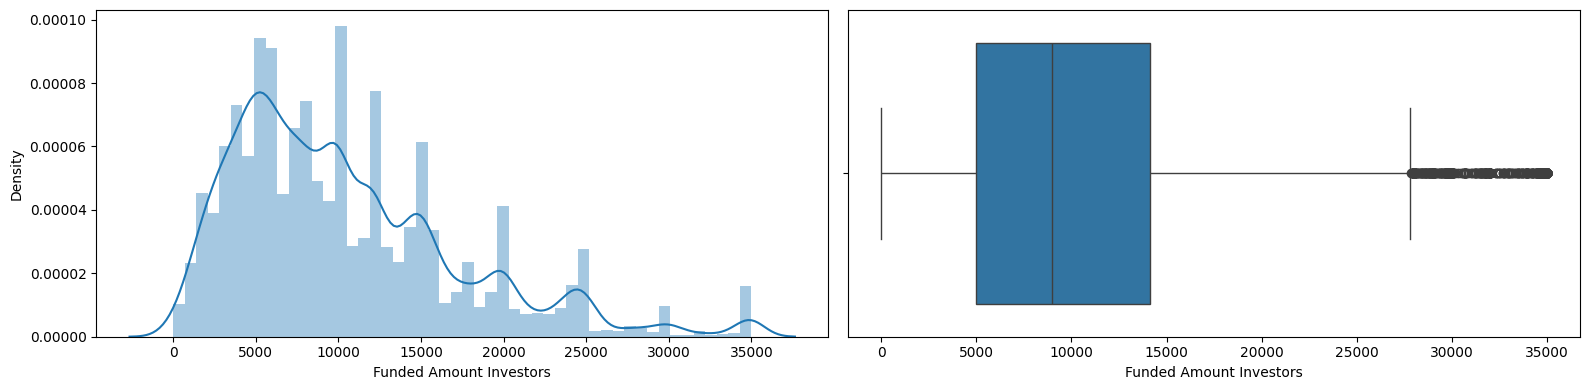

In [35]:
univariate_analysis(imp_data, 'funded_amnt_inv')

**Most of the loan funded amounts inv are between 5K to 14 K**

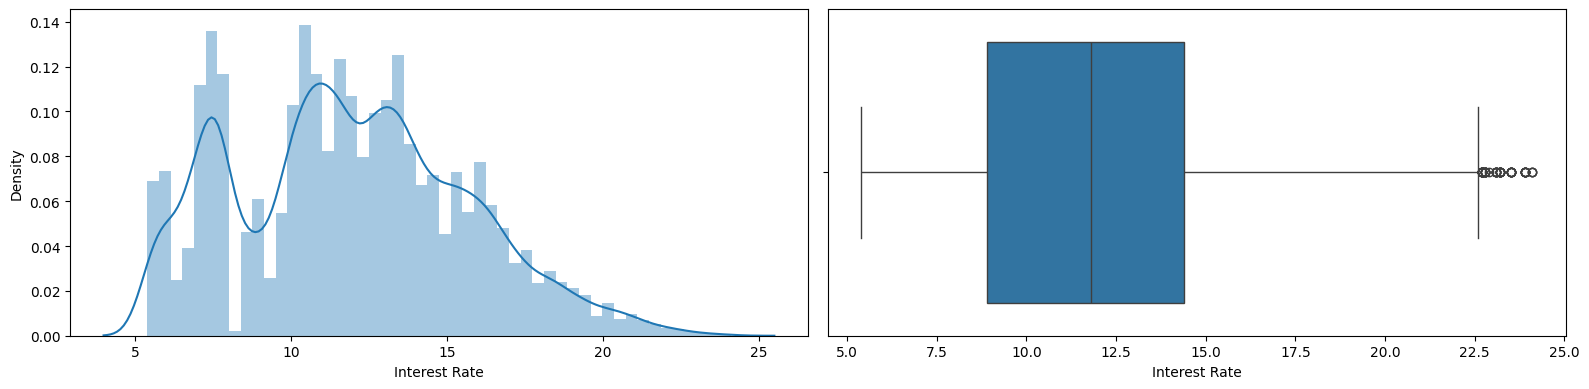

In [36]:
univariate_analysis(imp_data, 'int_rate')

**Most of the interest rates are are between 8.0 to 14.0**

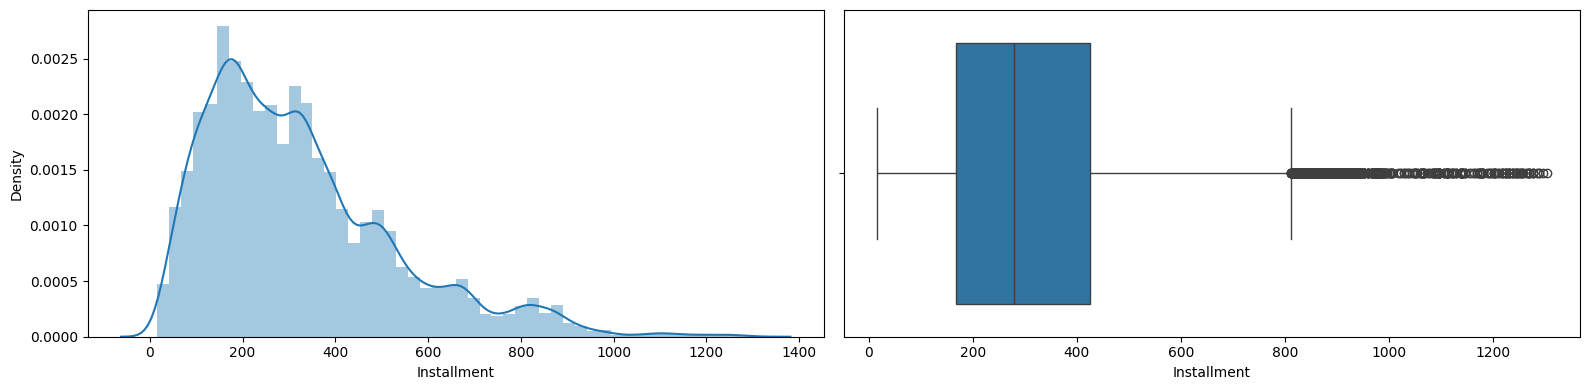

In [37]:
univariate_analysis(imp_data, 'installment')

**Most of the installments are between 180 to 420**

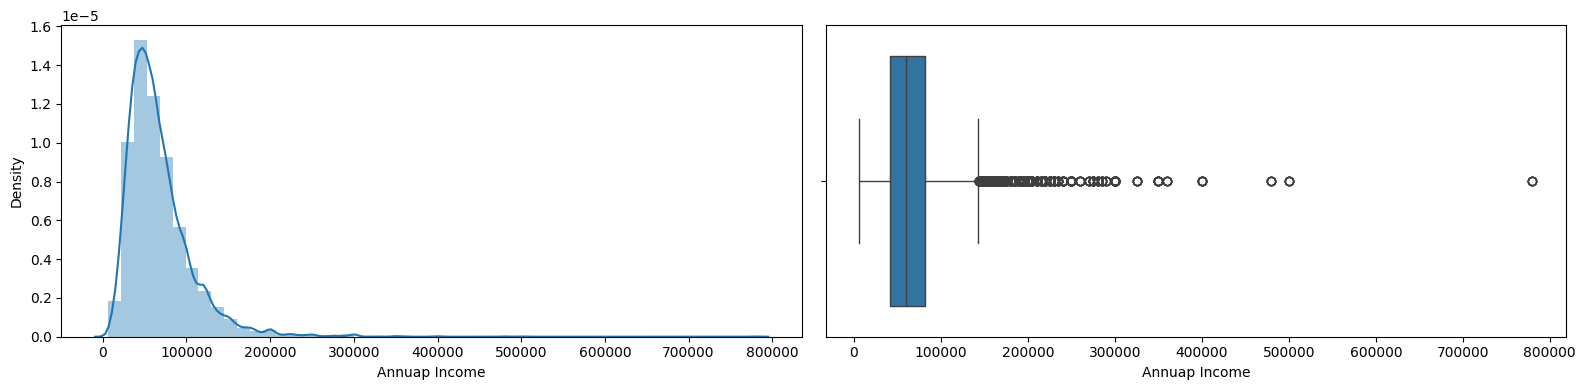

In [38]:
univariate_analysis(imp_data, 'annual_inc')

**Most of the annual income is between 5 lacs to 10 lacs**  This column required major outlier treatment.

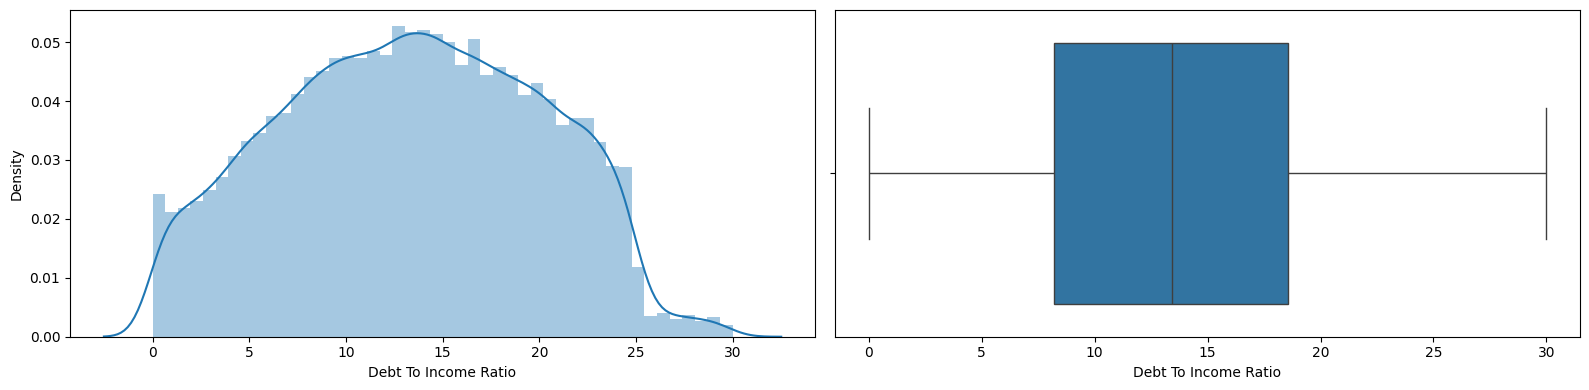

In [39]:
univariate_analysis(imp_data, 'dti')

**Most of the debt to income is between 5 to 25**

## Unordered Categorical Variable Analysis

<Axes: xlabel='home_ownership'>

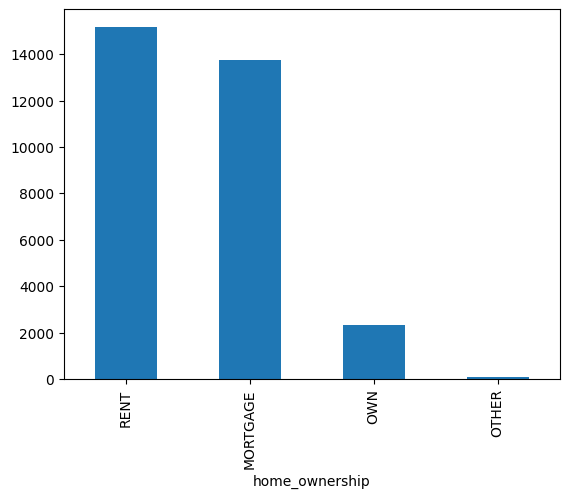

In [40]:
imp_data['home_ownership'].value_counts().plot.bar()

**Majority of the home owner status are in status of RENT and MORTGAGE**

<Axes: xlabel='purpose'>

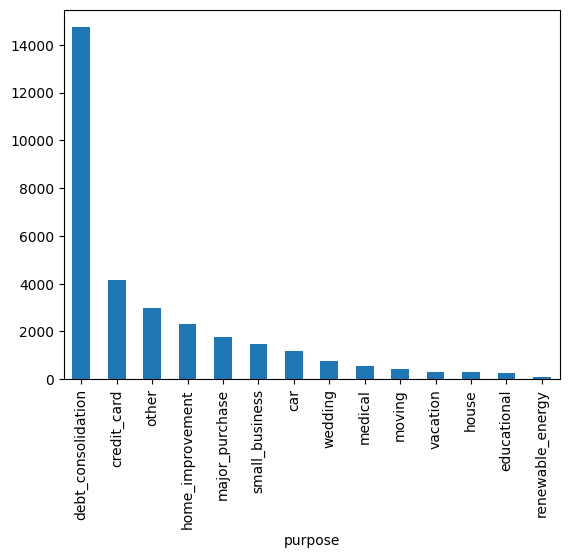

In [41]:
imp_data['purpose'].value_counts().plot.bar()

**Majority of the purposes of loan is debt consolidation**

<Axes: xlabel='addr_state'>

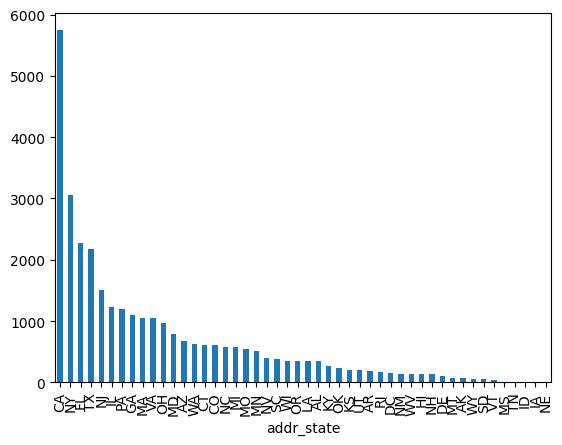

In [42]:
imp_data['addr_state'].value_counts().plot.bar()

**CA state has the maximum amount of loan applications**

## Ordered Categorical Variable Analysis

<Axes: xlabel='term'>

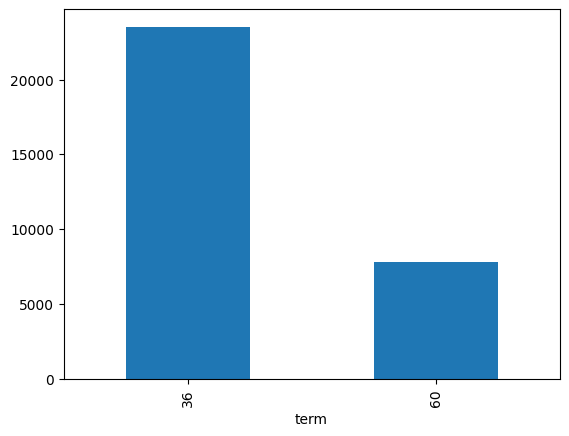

In [43]:
imp_data['term'].value_counts().plot.bar()

**Most of the loans are of 36 months**

<Axes: xlabel='grade'>

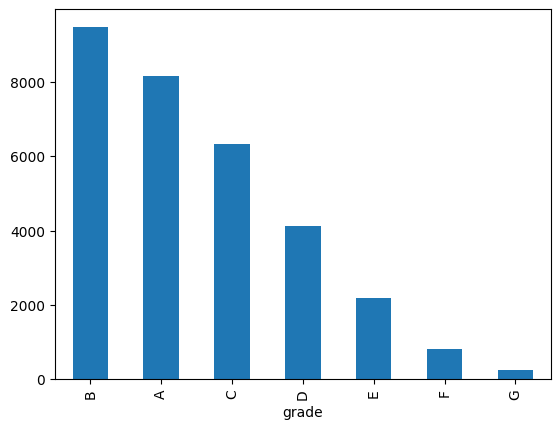

In [44]:
imp_data['grade'].value_counts().plot.bar()

**Most of the loans are of Grade B**

<Axes: xlabel='emp_length'>

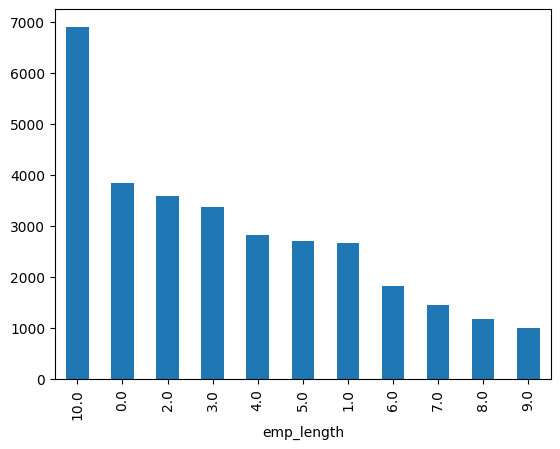

In [45]:
imp_data['emp_length'].value_counts().plot.bar()

**Majority of the employment length of the customers are 10+ years and then in the range of 0-2 years**

<Axes: xlabel='pub_rec_bankruptcies'>

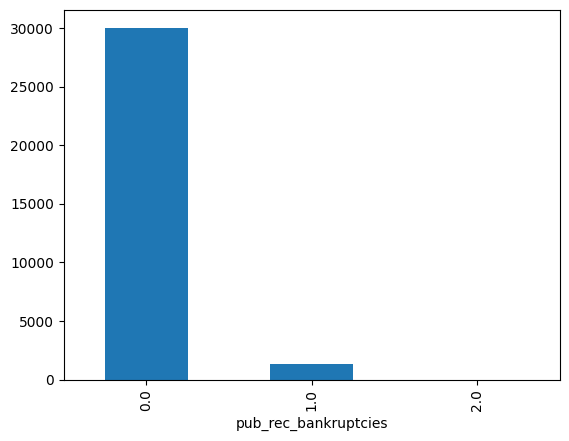

In [46]:
imp_data['pub_rec_bankruptcies'].value_counts().plot.bar()

**Majority of the loan applicants are in the category of not having an public record of bankruptcies**

## Derived Variable Analysis

<Axes: xlabel='issue_year'>

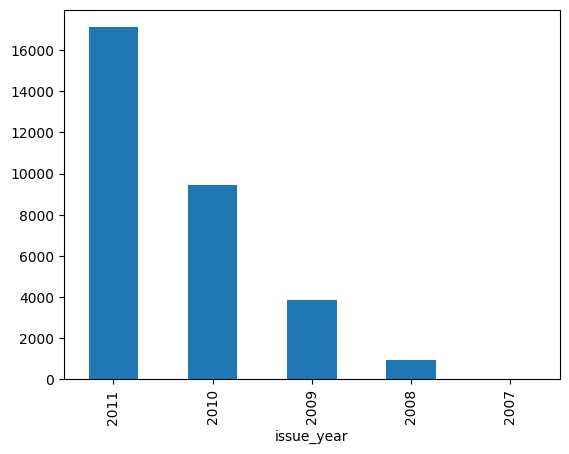

In [47]:
imp_data['issue_year'].value_counts().plot.bar()

**Loan application counts are increasing year over year. Maybe the risk exposure is increasing over the year (un proven hypothesis)**

<Axes: xlabel='issue_month'>

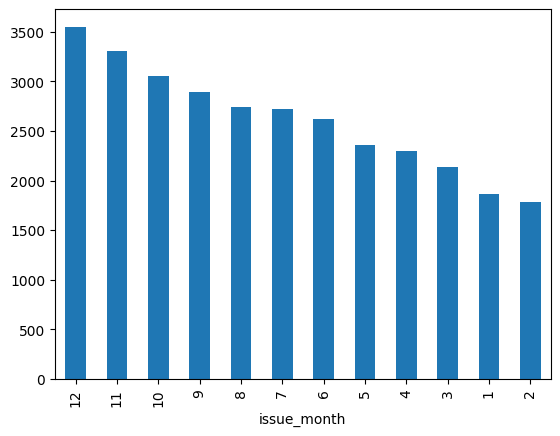

In [48]:
imp_data['issue_month'].value_counts().plot.bar()

**The lowest loans applocation count are in the month of Jan/Feb/March and highest counts are in 10/11/12.**
 - Possibly because by year ends people face the financial challenges
 - Possibly because of festive seasons
 - Possibly because they are consolidating debt by year end

<Axes: xlabel='issue_q'>

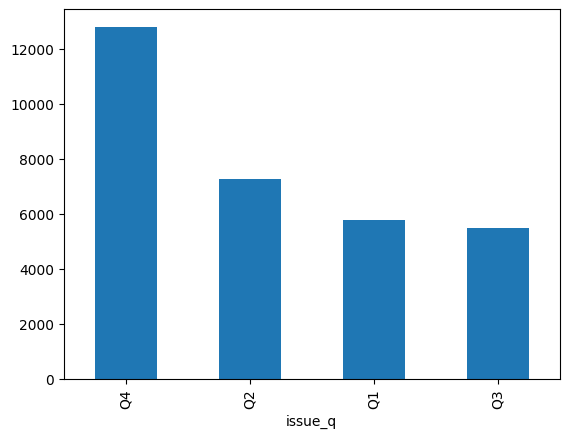

In [49]:
imp_data['issue_q'].value_counts().plot.bar()

**Highest loan application volume in Quarter 4 of a year**

<Axes: xlabel='loan_amnt_b'>

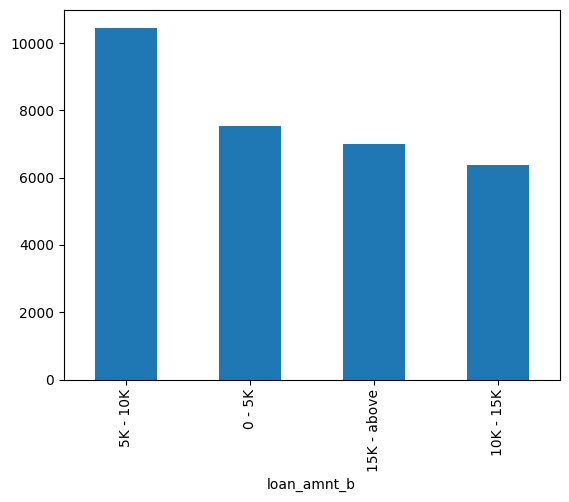

In [50]:
imp_data['loan_amnt_b'].value_counts().plot.bar()

**Highest loan amount applications fall in the range of 5k to 10k**

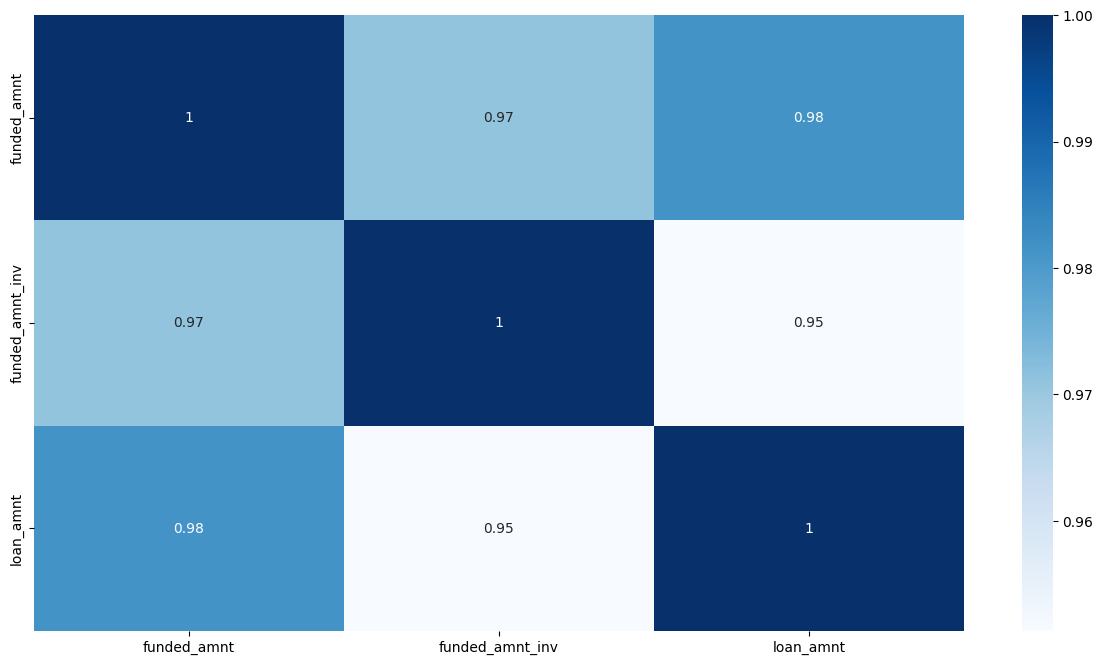

In [51]:
# Identifying key correlations
corr = imp_data.loc[:, [ 'funded_amnt', 'funded_amnt_inv', 'loan_amnt']].corr()
plt.figure(figsize = (15,8))
sn.heatmap(corr, annot = True, cmap='Blues')
plt.show()

<Axes: xlabel='annual_inc_b'>

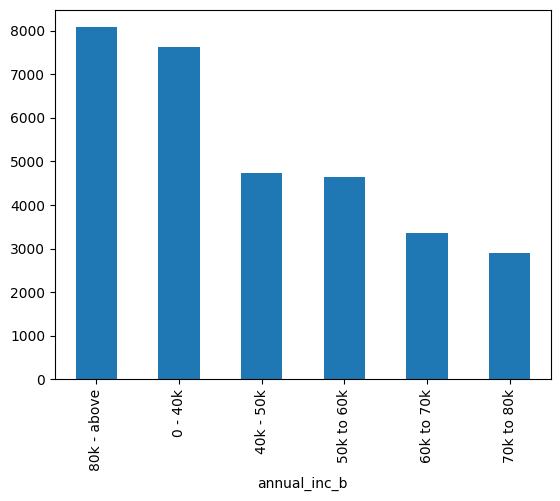

In [52]:
imp_data['annual_inc_b'].value_counts().plot.bar()

<Axes: xlabel='dti_b'>

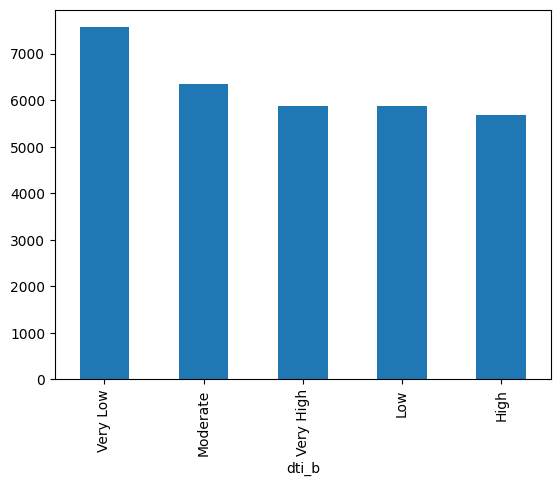

In [53]:
imp_data['dti_b'].value_counts().plot.bar()

## Univariate Analysis Summary

### Customer Demographics
- Majority of the loan applicants are in the range of 0 - 40K annual income
- Majority of the debt to income is in the range of 0 to 20 going at the max to 30
- Majority of the home owner status are in status of RENT and MORTGAGE
- Highest loan applications are in the category of debt_consolidation
- CA (California) state has the maximum amount of loan applications
- Majority of the loan applicants are in the category of not having an public record of bankruptcies
- Majority of the employment length of the customers are 10+ years and then in the range of 0-2 years

### Loan Demographics
- Highest loan amount applications fall in the range of 5k to 10k
- Majority of the interest rate is in the range of 5% to 16% going at the max to 22%
- Majority of the installment amount is in the range of 20$ to 400$
- Majority of the loan applications counts are in the term of 36 months
- Majority of loan application counts fall under the catogory of Grade B

### Time Based Analysis
- Loan application counts are increasing year over year
- Highest loan application volume in Quarter 4 of every year
- Lowest loan applications are in Q1
     - Possibly because by year ends people face the financial challenges
     - Possibly because of festive seasons
     - Possibly because they are consolidating debt by year end

### Inferences
- The customer demographic data shws which segment of customers to target for highest volume of loan
- Indicates more analysis is needed why other categories are not as high as other few
- Indicates the LendingClub to be prepared with volume in Q4
- Indicates the LendingClub to target customers in other quarters to increase sales

## Bivariate Analysis

### Analysis vs Charged Off Status

In [54]:
def ratio_wise(df, column):
    rw = df.pivot_table(index=column, columns='loan_status', values='id', aggfunc=len).reset_index()
    rw['total'] = rw['Charged Off'] + rw['Fully Paid']
    rw['charge_off_ratio'] = round(rw['Charged Off'] / rw['total'] * 100)
    rw.sort_values(by='total', ascending=False)
    return rw

def ratio_wise_plot(df, column, invert=False):
    plt.figure(figsize=[20,8])
    plt.title('Charged Off : ' + column_titles[column])
    rw = ratio_wise(df, column)
    if invert:
        sn.barplot(x=rw['charge_off_ratio'],y= rw[column])
    else:
        sn.barplot(x=rw[column], y=rw['charge_off_ratio'])
    plt.tight_layout()
    plt.show()
    return rw
    
def series_plot(df, column, hue=None, annot=1):
        temp = pd.Series()
        fig, ax = plt.subplots(figsize=(20,14))
        width = len(df[column].unique()) + 6 + 4 * len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sn.countplot(data = df, x=column, order=df[column].value_counts().index, hue=hue) 
        if annot == 1:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))  
        elif annot == 2:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
        plt.show()

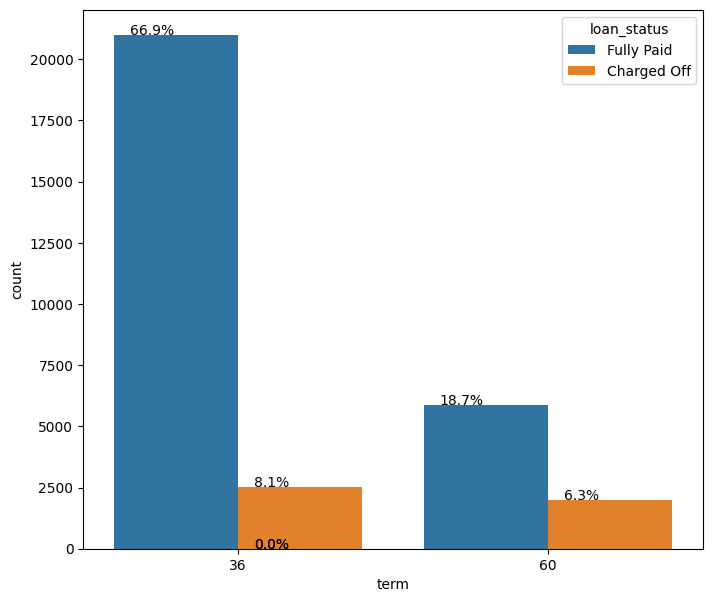

In [55]:
# Overall ratio of Charge Offs
series_plot(imp_data, 'term', 'loan_status')

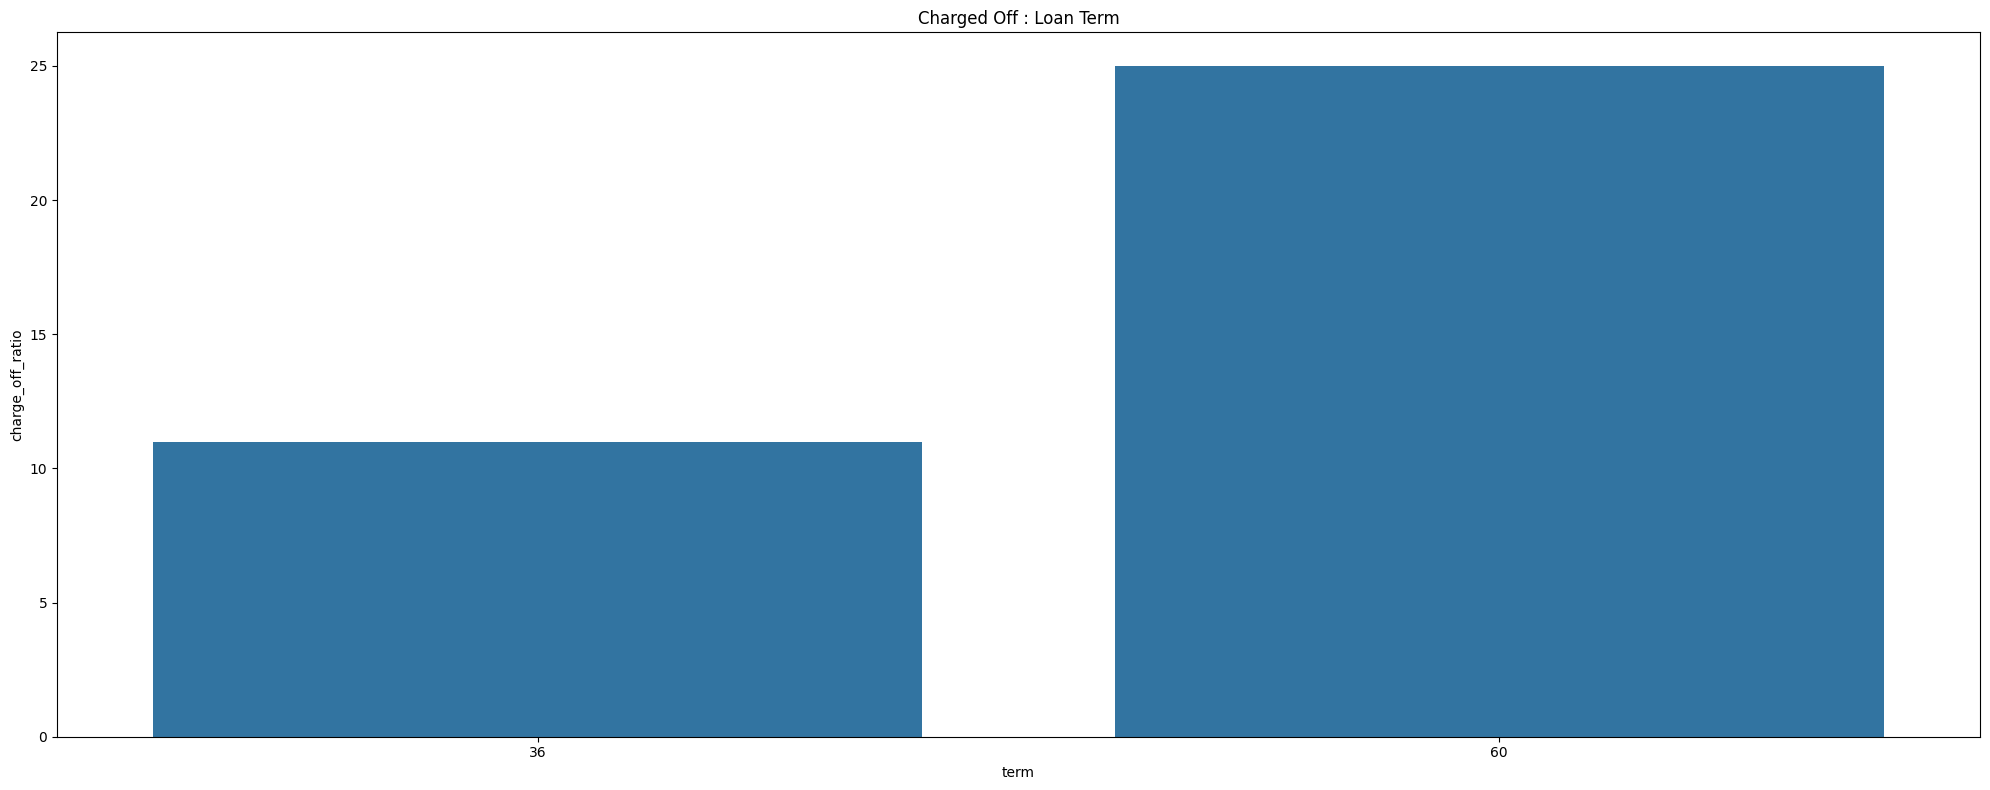

loan_status,term,Charged Off,Fully Paid,total,charge_off_ratio
0,36,2529,20972,23501,11.0
1,60,1975,5863,7838,25.0


In [56]:
## The ratio of Charge Offs within the category
ratio_wise_plot(imp_data, 'term')

***
- The volume of loans are in the category of term = 36
- The overall percentage of Charge Off's is slightly higher in term = 36 (8%) as compared to term=60 (6%)
- If we calculate the ratio of Charge Off's within a category
    - **Charge Off**s ratio is for the term=60 is 25% which is much higher than term=36 (10%)
    - **term=60 is the loan applications which require more scrutiny**
- **Inferences**
    - Most of the applicants with term=60 potentially will have high Charge Offs
***

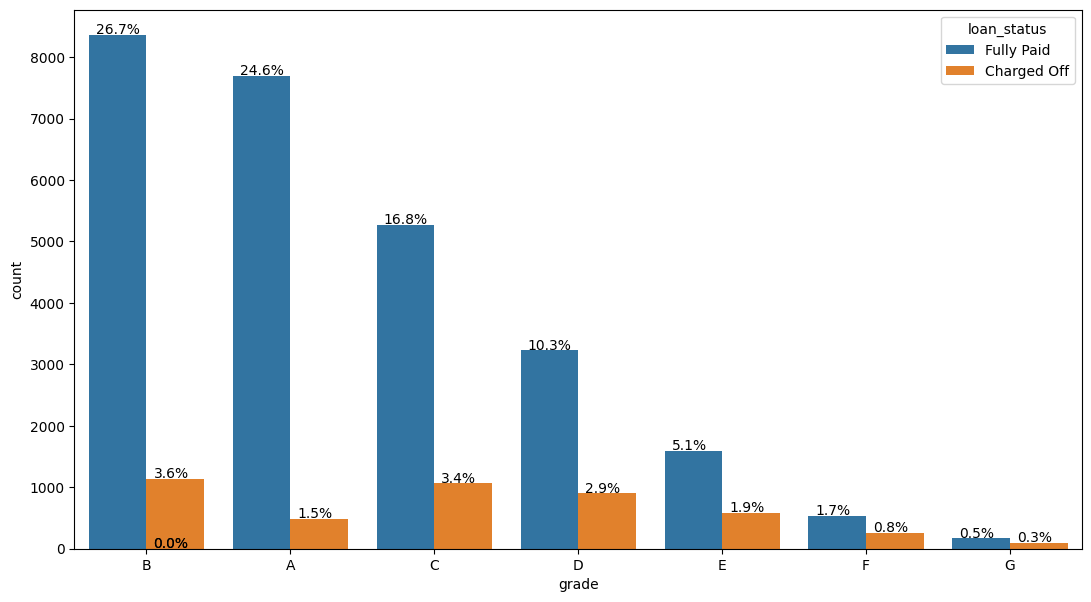

In [57]:
# Overall ratio of Charge Offs against the total
series_plot(imp_data, 'grade', 'loan_status')

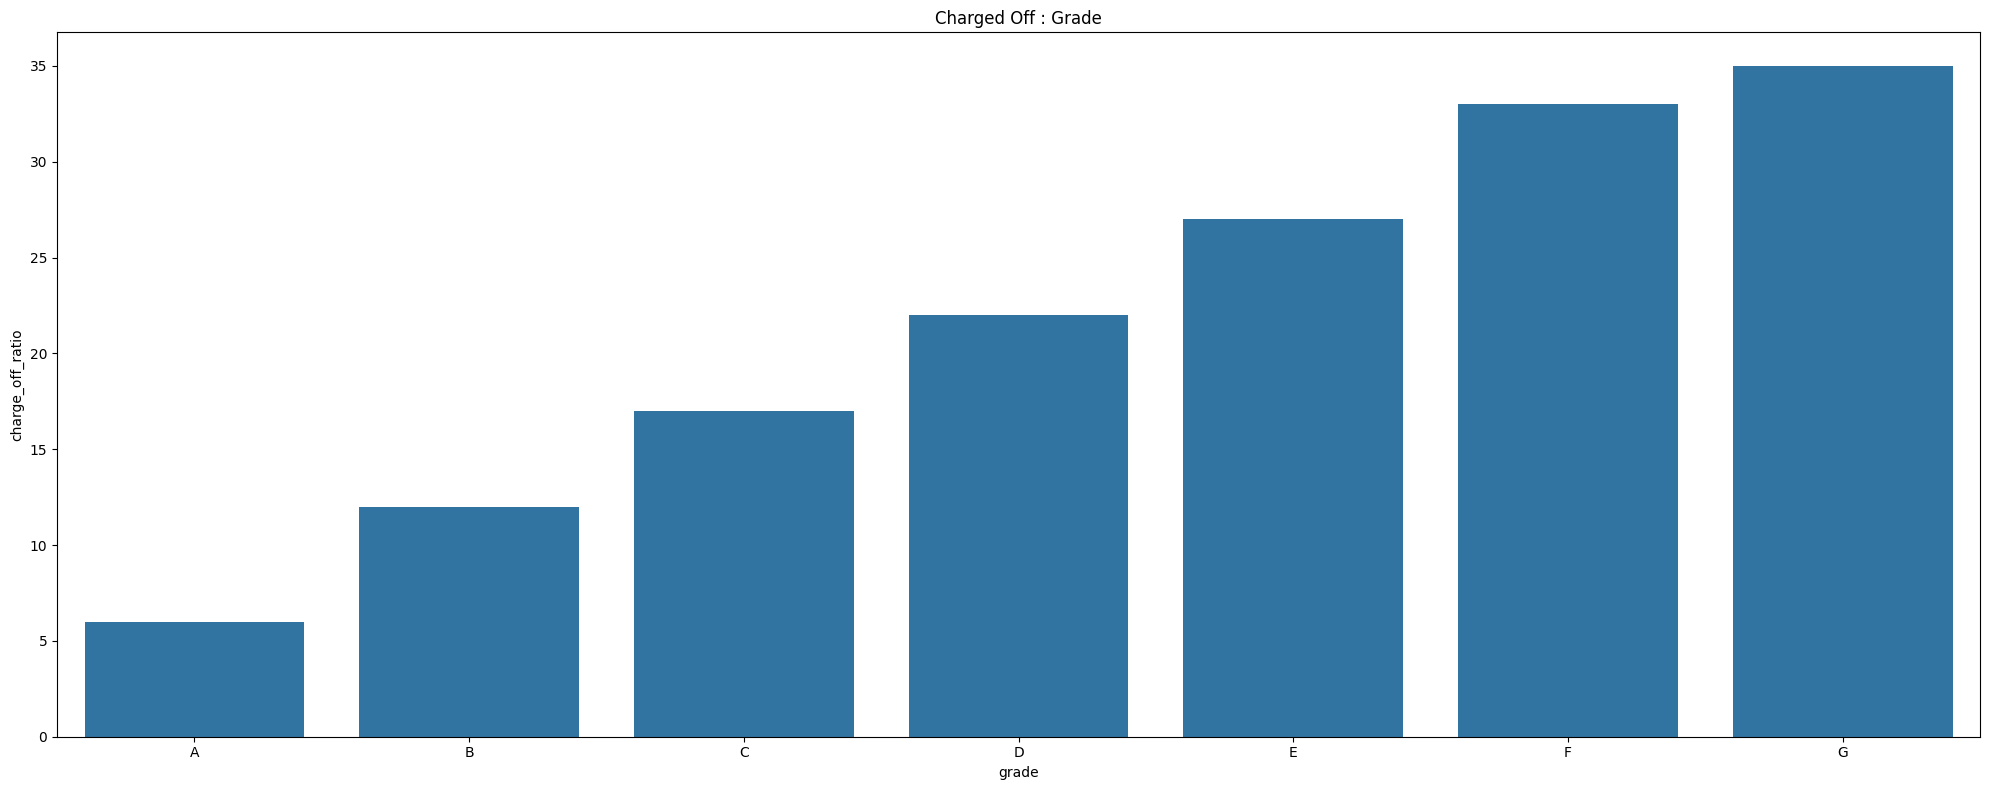

loan_status,grade,Charged Off,Fully Paid,total,charge_off_ratio
0,A,478,7697,8175,6.0
1,B,1132,8354,9486,12.0
2,C,1062,5268,6330,17.0
3,D,899,3226,4125,22.0
4,E,586,1587,2173,27.0
5,F,259,536,795,33.0
6,G,88,167,255,35.0


In [58]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(imp_data, 'grade')

***
- The Majority of *loan volume is in grade=B*
- Highest percentage of overall Charge Offs are in grade B (3.7%) and C(3.6%)
- If we analyse the Charge Off Ratio within a category
    - The highest percentage of **Charge Off**s are in the *grade=G*
    - Highest cluster of **Charge Off**s are in the grades G,F (> 30%)
    - The volume of Grade G is extremely low 158 thus it does not contribute to overall risk significantly
- **Inferences**
    - Highest risk of charge off's are in the grades of B and C
    - Grade "F" and "G" have very high chances of charged off. The columes are low
    - Grade "A" has very less chances of charged off.
    - Probablity of charged off is increasing from "A" to "G"
***

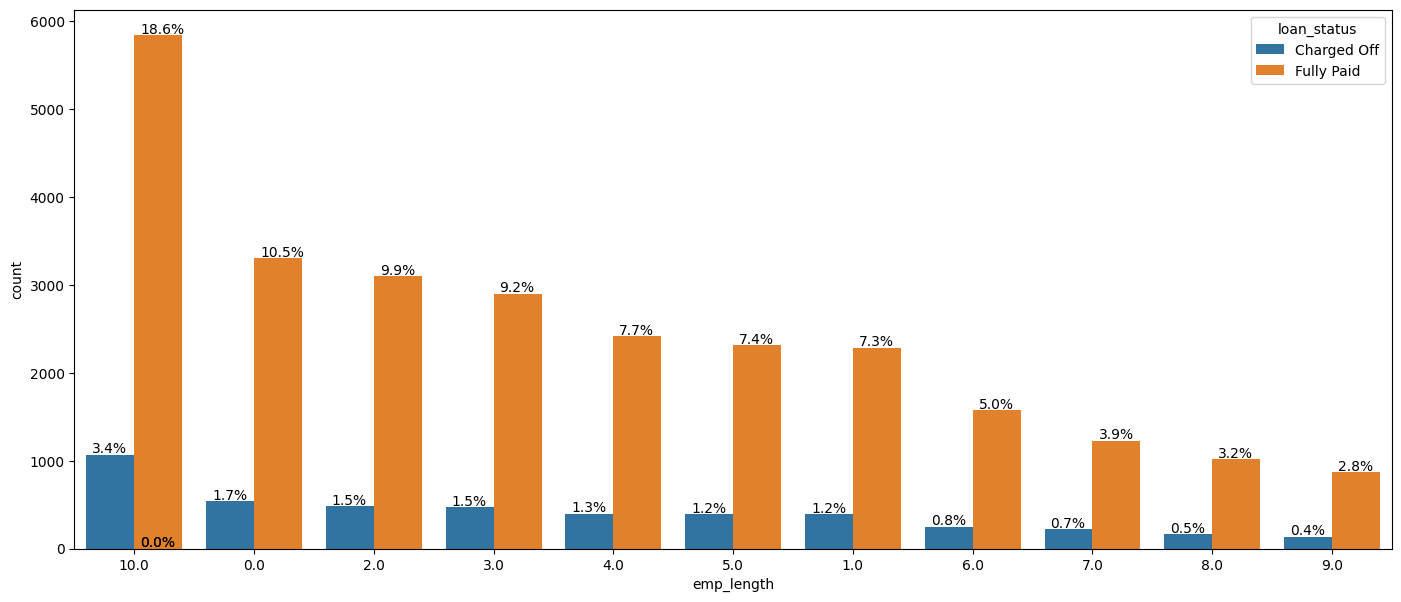

In [59]:
# Overall ratio of Charge Offs against the total
series_plot(imp_data, 'emp_length', 'loan_status')

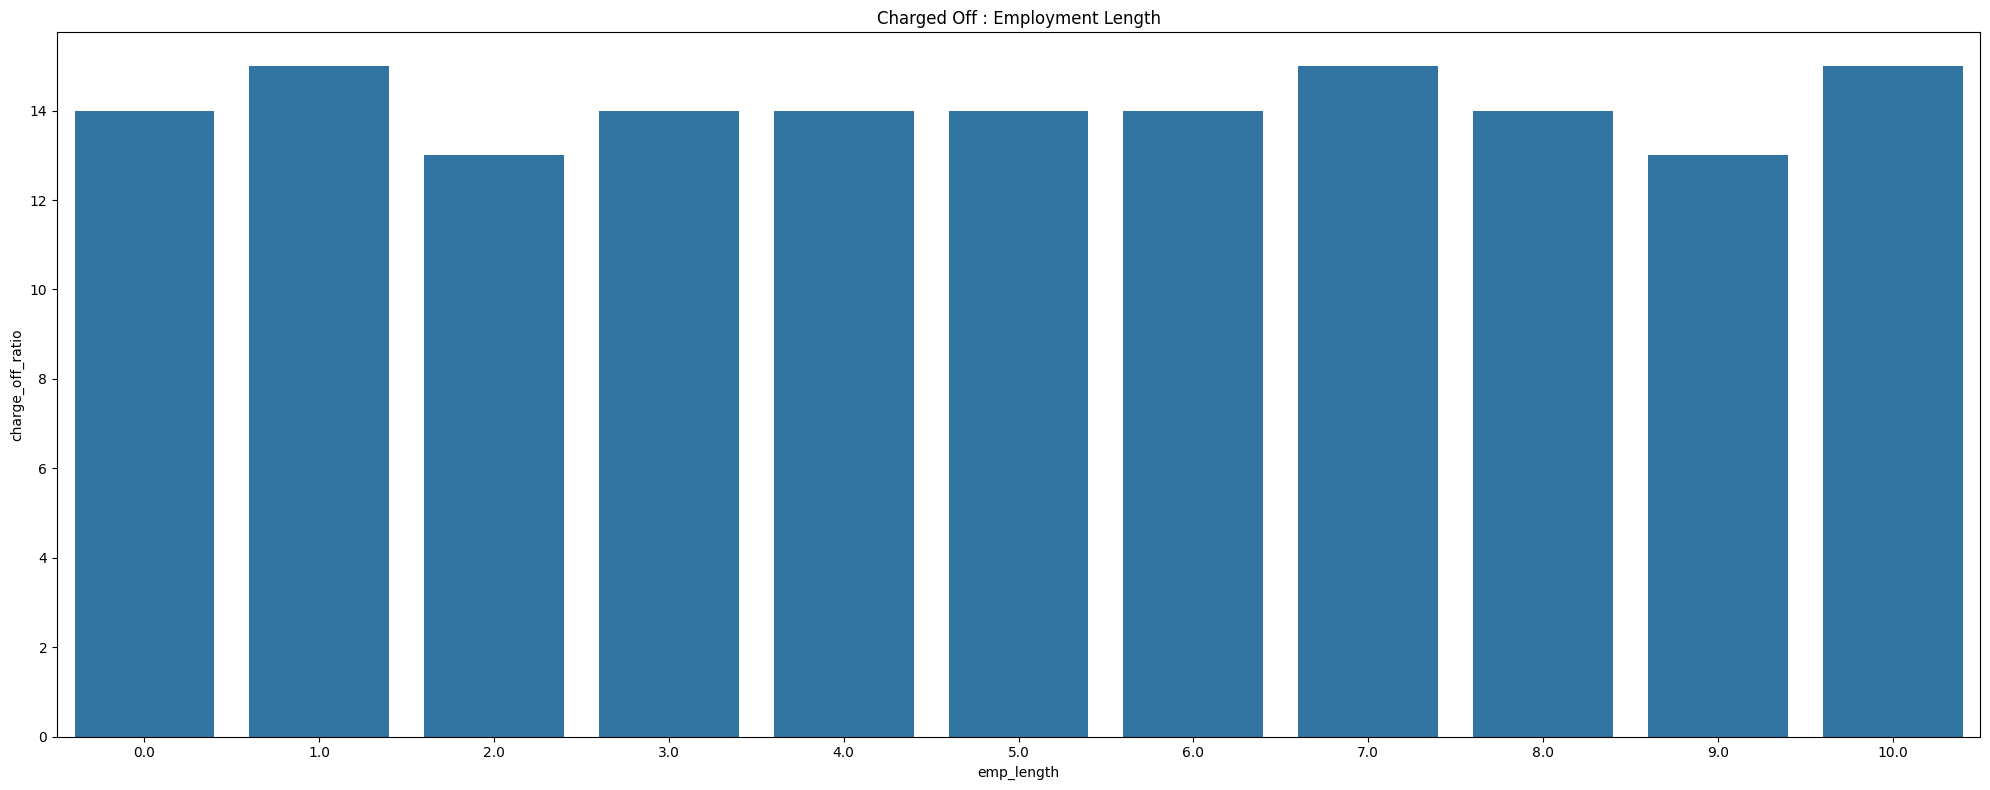

loan_status,emp_length,Charged Off,Fully Paid,total,charge_off_ratio
0,0.0,539,3300,3839,14.0
1,1.0,388,2283,2671,15.0
2,2.0,479,3101,3580,13.0
3,3.0,473,2897,3370,14.0
4,4.0,396,2418,2814,14.0
5,5.0,391,2316,2707,14.0
6,6.0,249,1572,1821,14.0
7,7.0,221,1227,1448,15.0
8,8.0,164,1014,1178,14.0
9,9.0,135,870,1005,13.0


In [60]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(imp_data, 'emp_length')

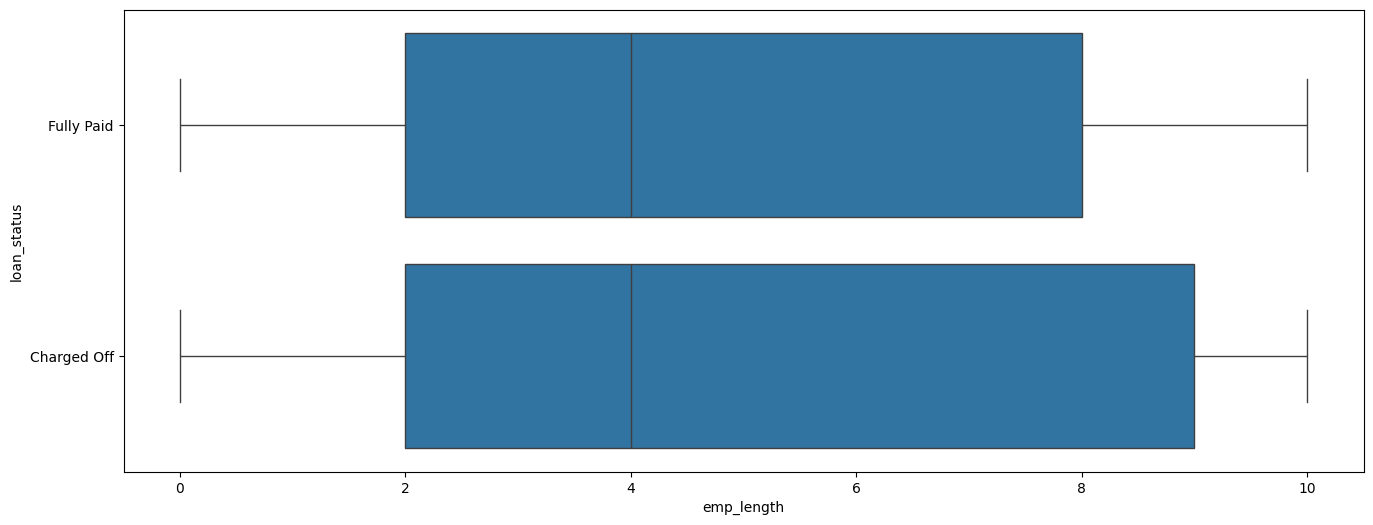

In [61]:
plt.figure(figsize=(16,6))
sn.boxplot(y=imp_data.loan_status,x=imp_data.emp_length)
plt.show()

***
- Highest Charge Offs are in the employee length categoty of 10 Years and above
- Charge Off ratio within the categories itself are similar and inconclusive
- **Inferences**
    - Highest Charge Offs are in the employee length of 10 Years and above
    - High probablity of Charge Off's whose income range is less than 1 years
    - Ratio within the ranges are pretty much same (in conclusive)
***

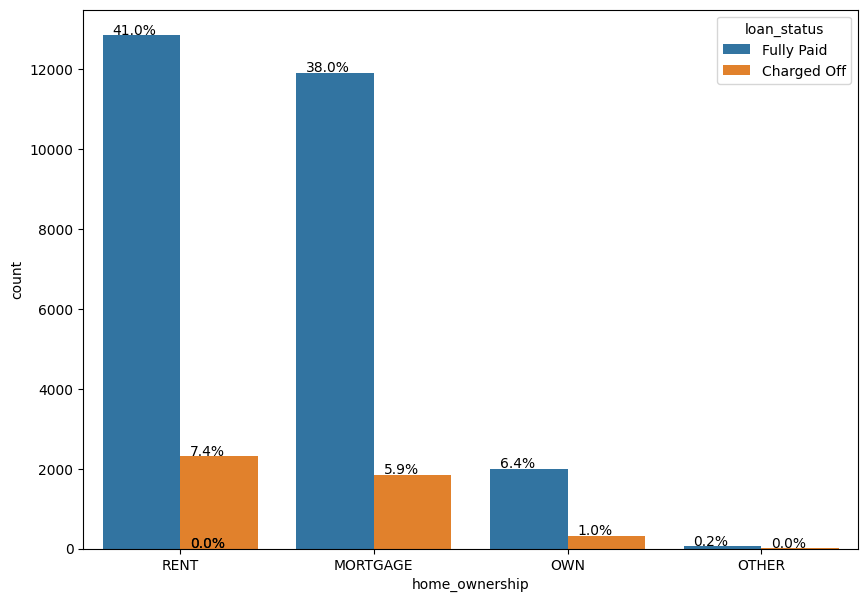

In [62]:
# Overall ratio of Charge Offs against the total
series_plot(imp_data, 'home_ownership', 'loan_status')

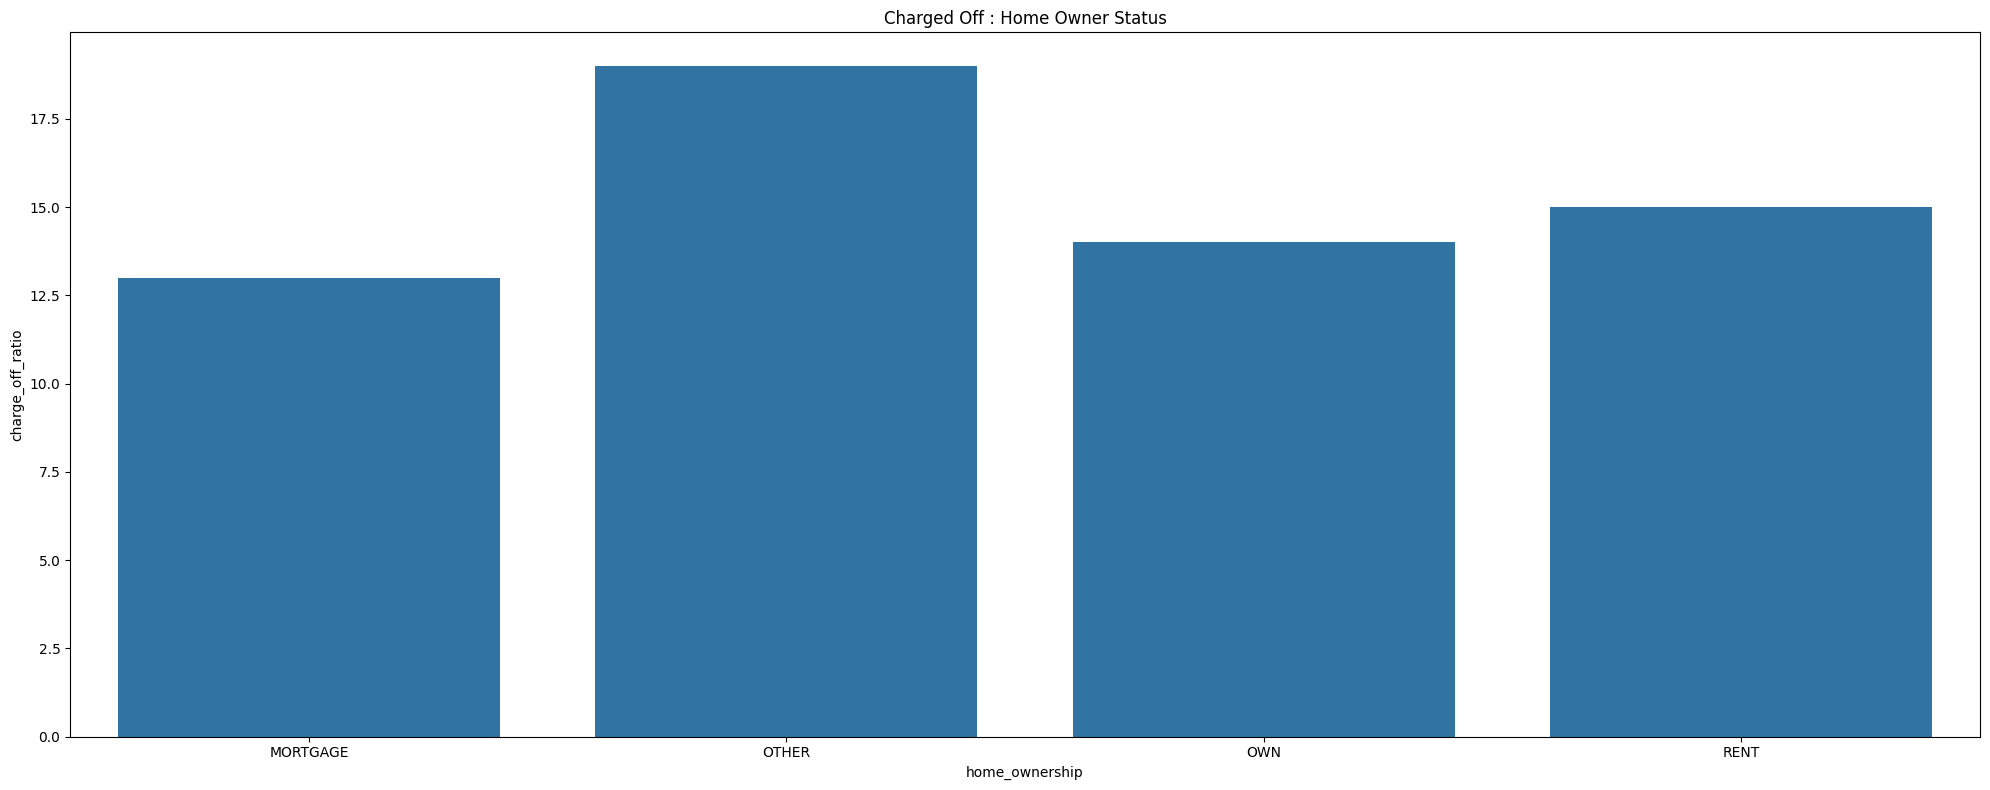

loan_status,home_ownership,Charged Off,Fully Paid,total,charge_off_ratio
0,MORTGAGE,1852,11913,13765,13.0
1,OTHER,15,62,77,19.0
2,OWN,327,2005,2332,14.0
3,RENT,2310,12855,15165,15.0


In [63]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(imp_data, 'home_ownership')

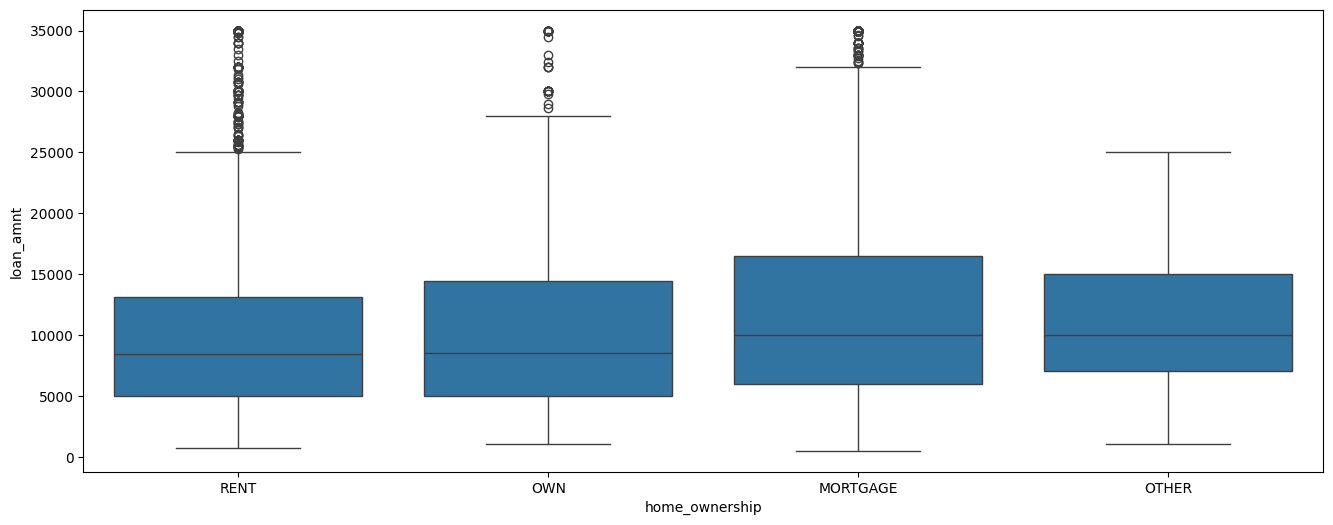

In [64]:
plt.figure(figsize=(16,6))
sn.boxplot(y=imp_data.loan_amnt,x=imp_data.home_ownership)
plt.show()

***
- Overall highest Charge Off numbers are in the category of RENT and MORTGAGE
- Within each home_ownership category the ratio of Charge Off's for Other is higher
- **Inferences**
    - The home_ownership status of MORTGAGE and are at the highest risk of Charge Offs
    - MORTGAGE status also has the highest range of loan amounts increasing the risk
***

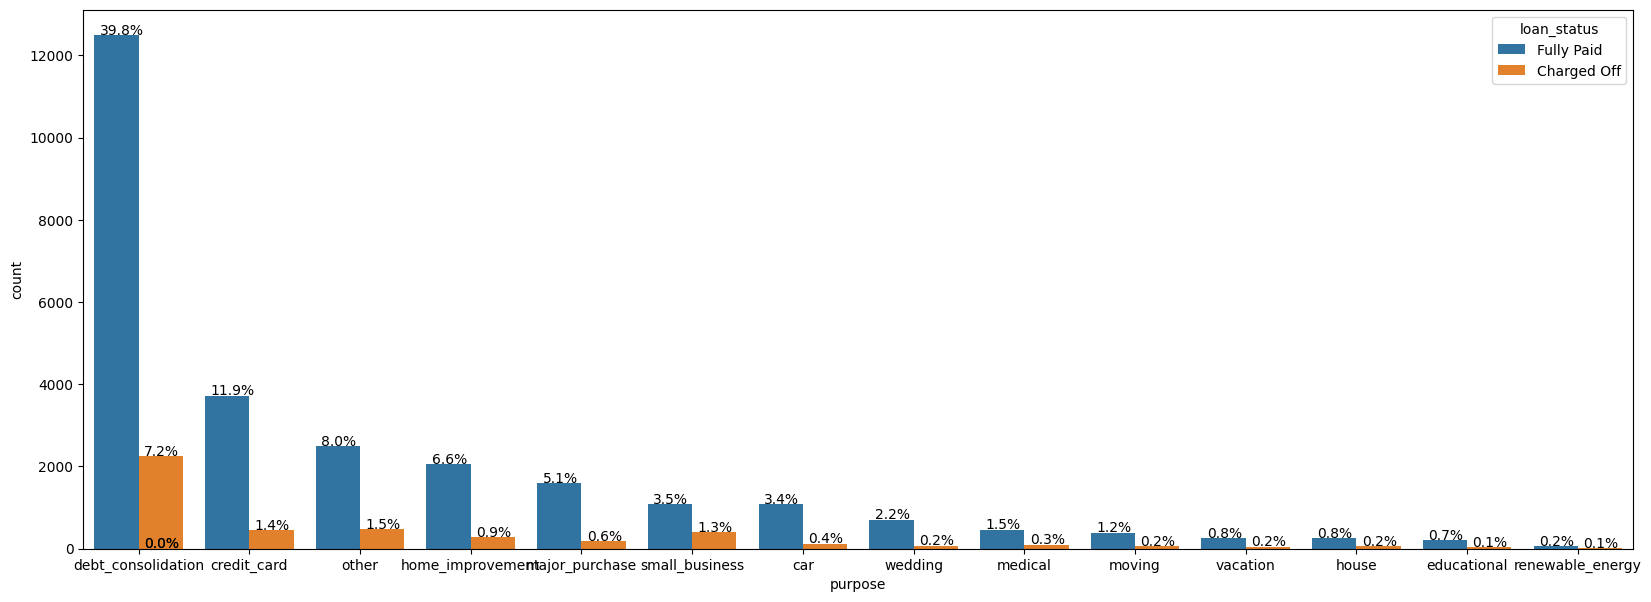

In [65]:
# Overall ratio of Charge Offs against the total
series_plot(imp_data, 'purpose', 'loan_status')

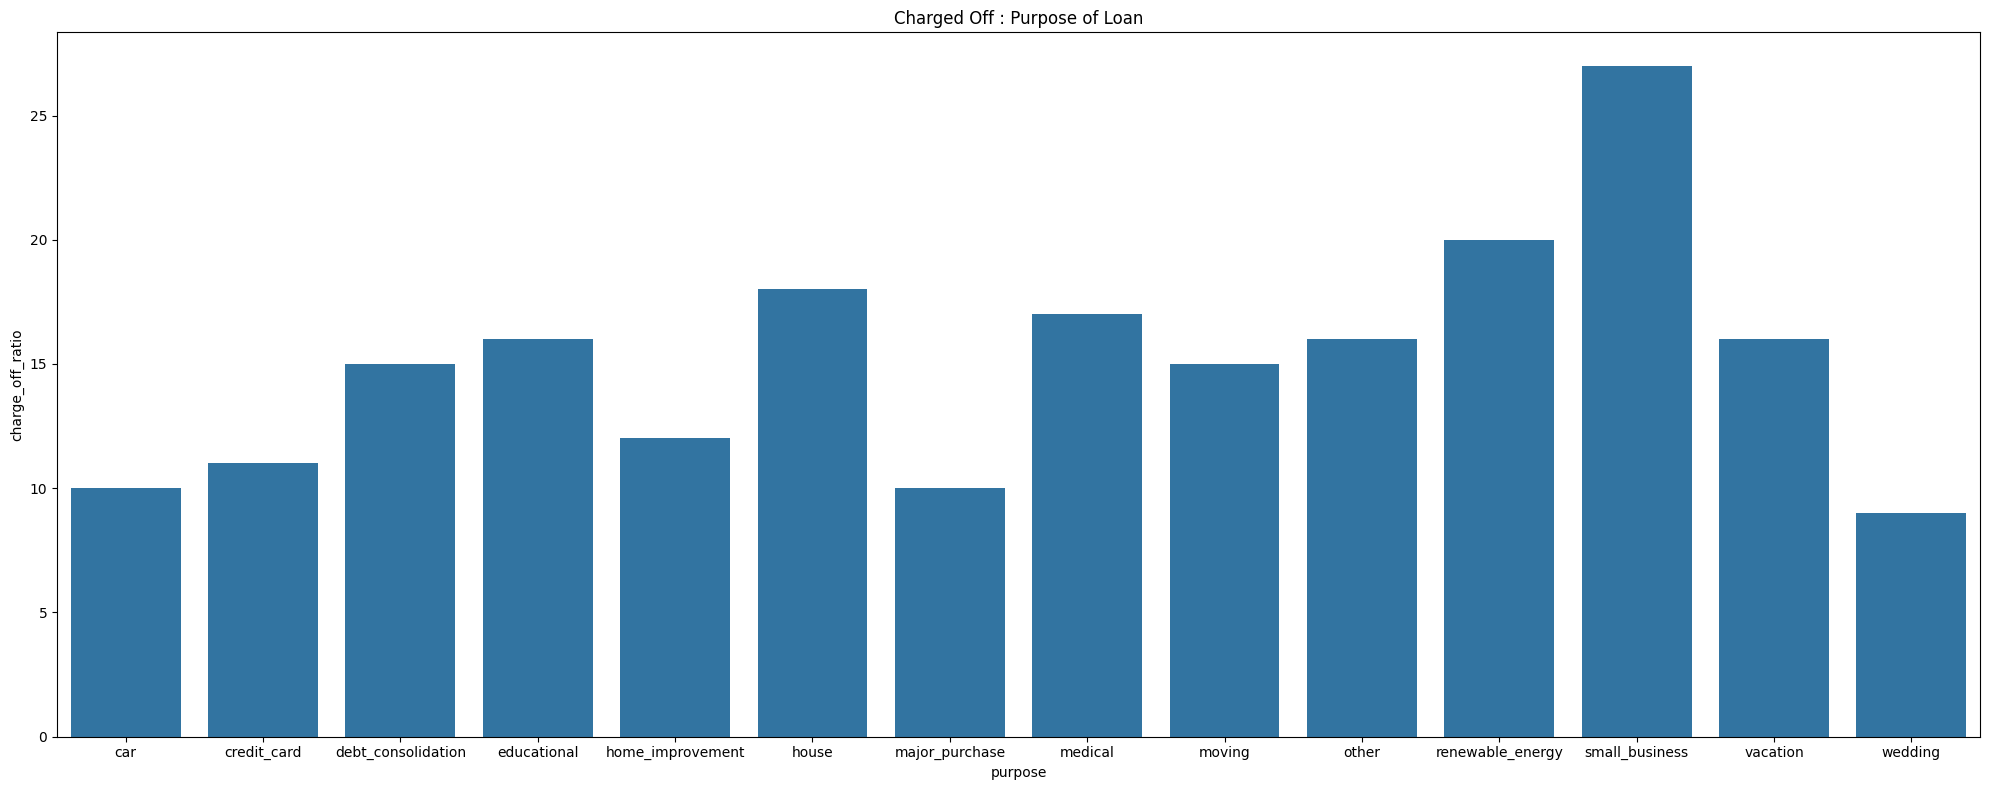

loan_status,purpose,Charged Off,Fully Paid,total,charge_off_ratio
0,car,120,1078,1198,10.0
1,credit_card,442,3720,4162,11.0
2,debt_consolidation,2245,12488,14733,15.0
3,educational,38,207,245,16.0
4,home_improvement,274,2058,2332,12.0
5,house,53,247,300,18.0
6,major_purchase,174,1596,1770,10.0
7,medical,91,456,547,17.0
8,moving,65,383,448,15.0
9,other,467,2496,2963,16.0


In [66]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(imp_data, 'purpose')

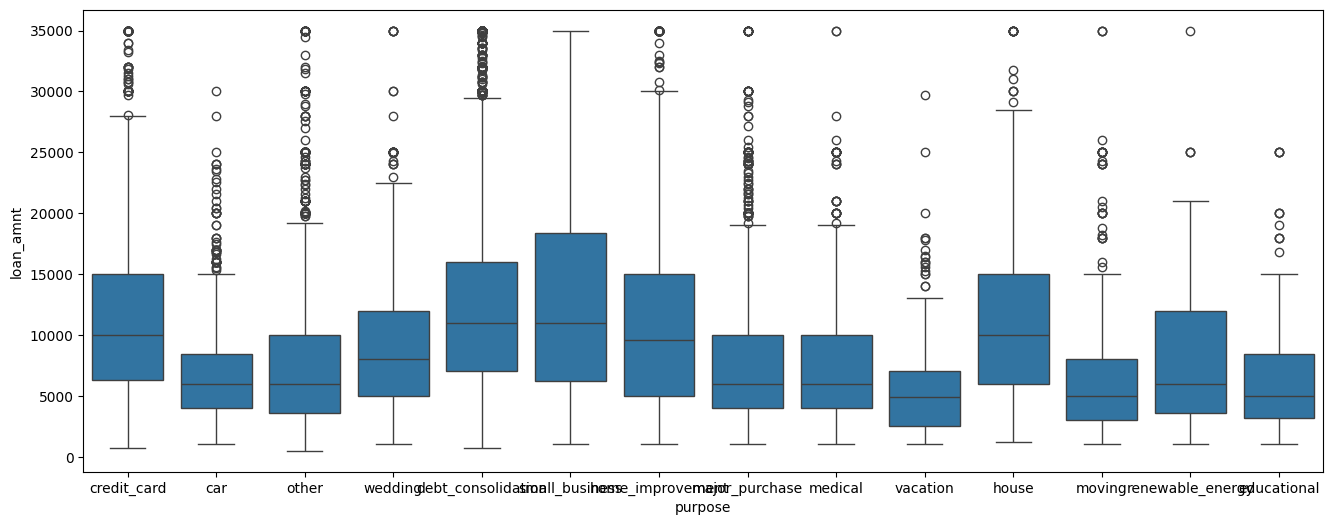

In [67]:
plt.figure(figsize=(16,6))
sn.boxplot(y=imp_data.loan_amnt,x=imp_data.purpose)
plt.show()

***
- Highest risk of Charge Offs are the category of debt_consolidation
- Highest probablity of Charge Offs within a category are small_business but the volume is extremely low
- Highest loan amount ranges are in small business, debt consolidation and house
- **Inferences**
    - Highest risk of Charge Off's are the purpose of debt_consolidation
    - Small Business applicants have high chances of getting charged off.
    - renewable_energy has lowest risk of Charge Off's in volume
***

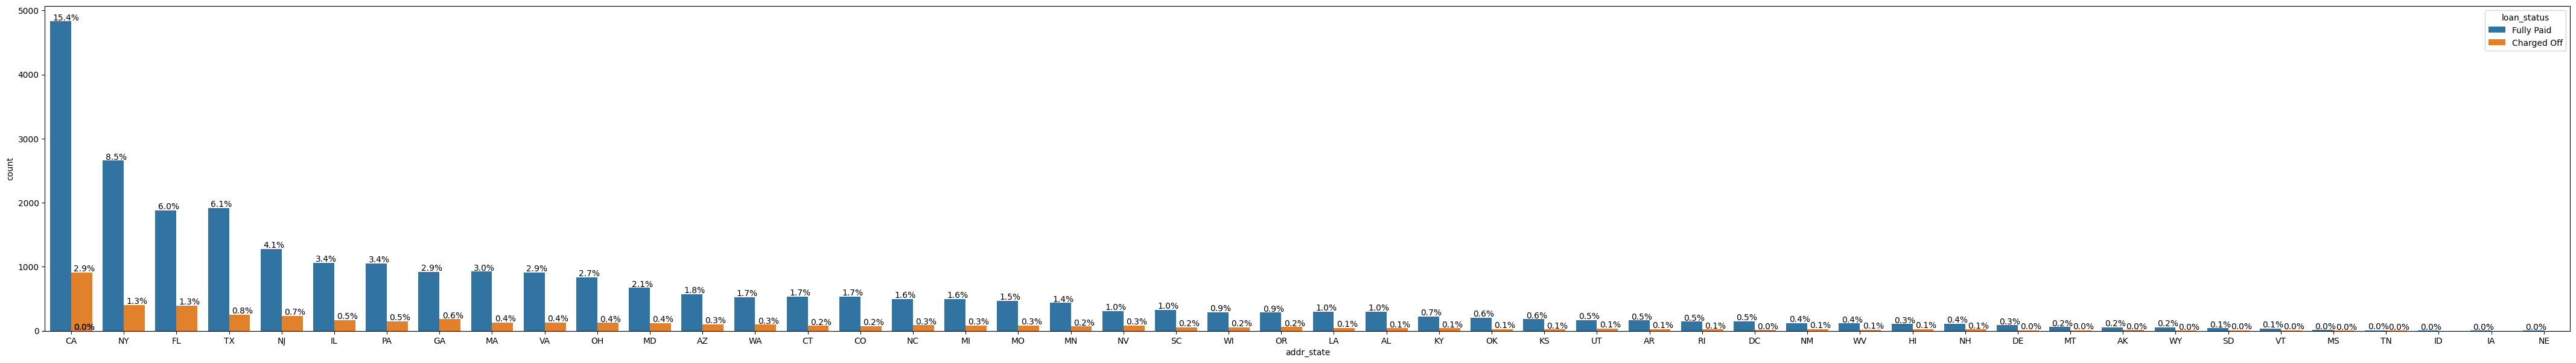

In [68]:
# Overall ratio of Charge Offs against the total
series_plot(imp_data, 'addr_state', 'loan_status')

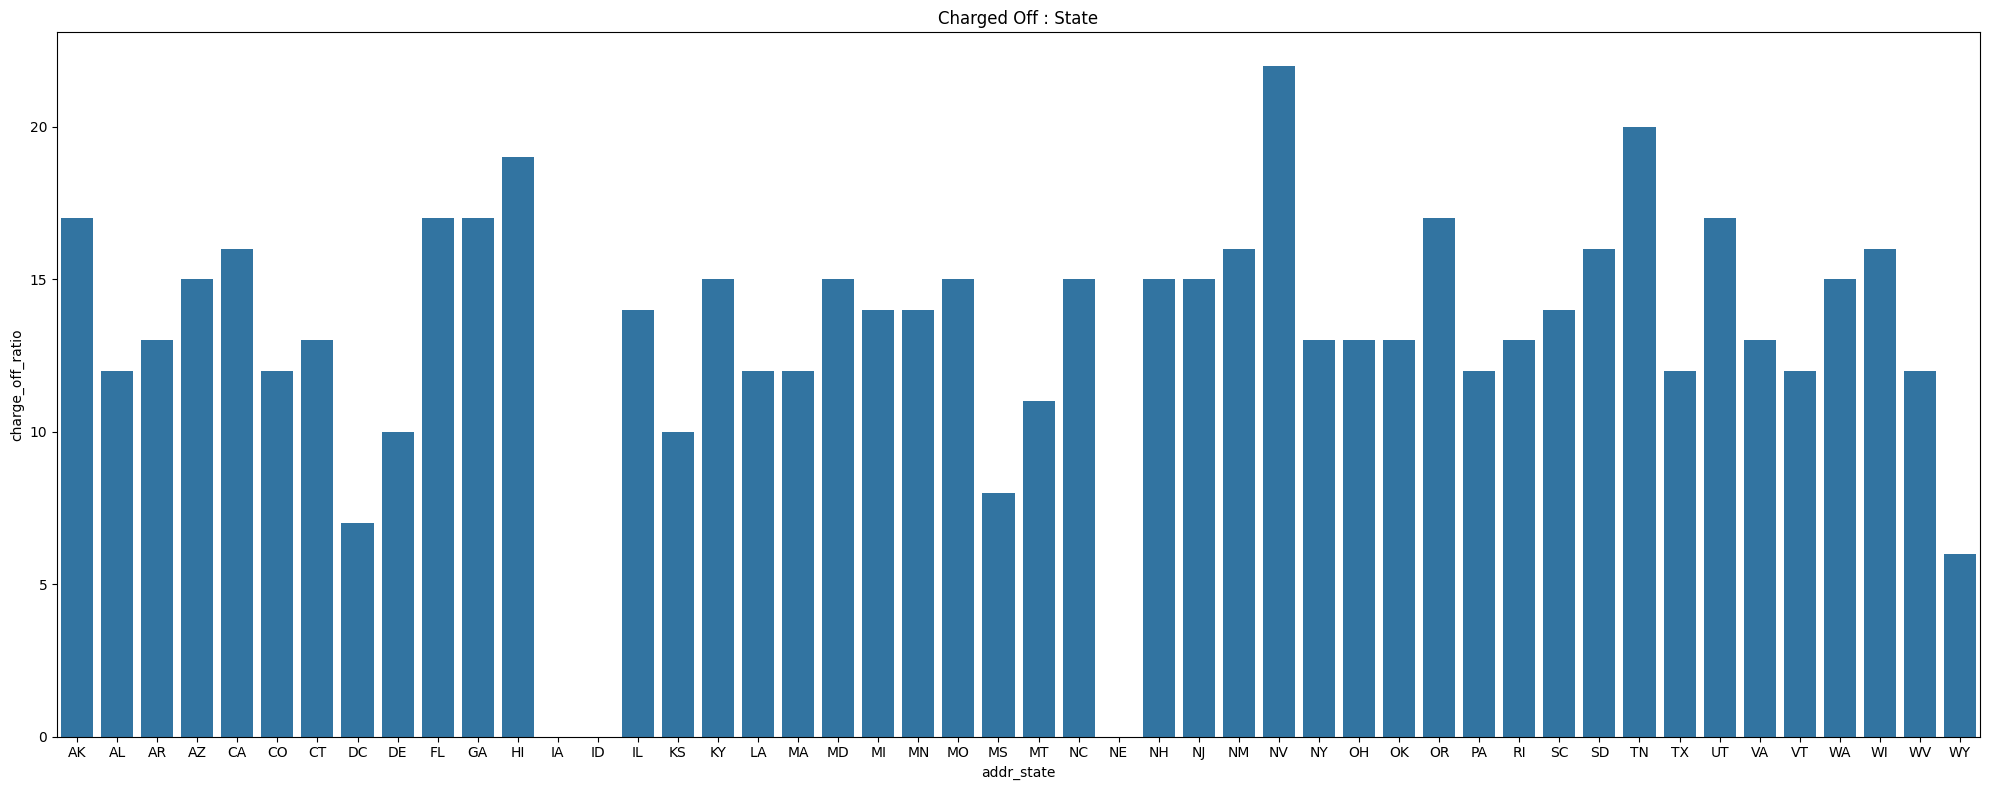

loan_status,addr_state,Charged Off,Fully Paid,total,charge_off_ratio
0,AK,11.0,52.0,63.0,17.0
1,AL,40.0,300.0,340.0,12.0
2,AR,24.0,161.0,185.0,13.0
3,AZ,98.0,569.0,667.0,15.0
4,CA,911.0,4831.0,5742.0,16.0
5,CO,73.0,531.0,604.0,12.0
6,CT,77.0,535.0,612.0,13.0
7,DC,11.0,148.0,159.0,7.0
8,DE,10.0,88.0,98.0,10.0
9,FL,392.0,1879.0,2271.0,17.0


In [69]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(imp_data, 'addr_state')

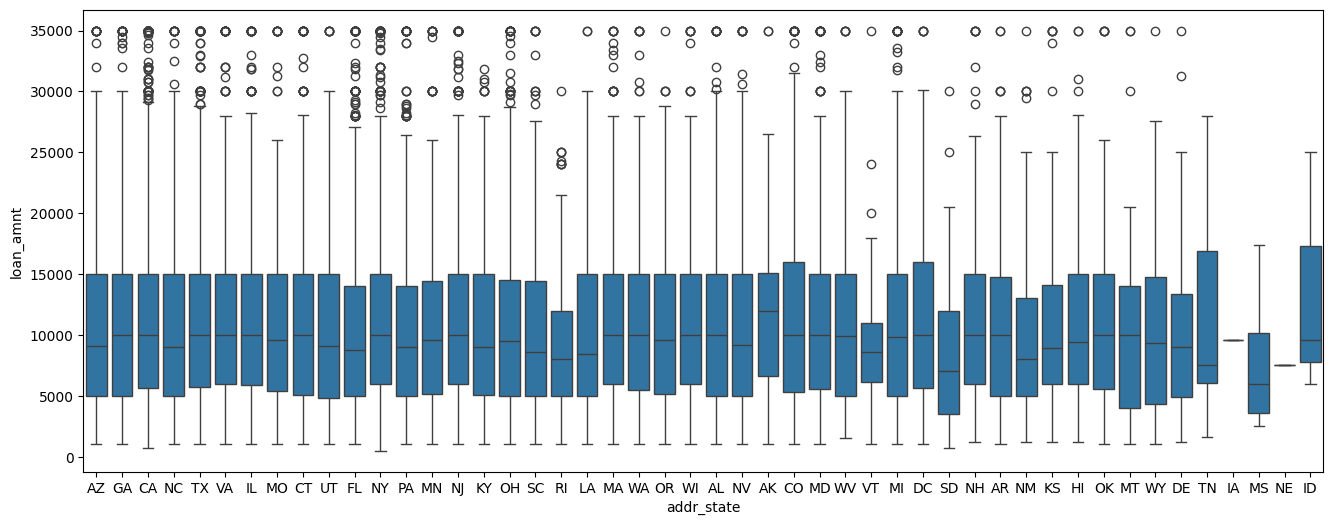

In [70]:
plt.figure(figsize=(16,6))
sn.boxplot(y=imp_data.loan_amnt,x=imp_data.addr_state)
plt.show()

***
- Highest volume of loans is from CA and purely based on volumes the hoghest Charge Off's are from CA
- Within each state NE and NV has the highest Charge Offs
- NE has very low volume this cannot be considered
- Loan applications from NV will have high risk
- **Inferences**
    - Loan applications from NV (Neveda) have high risk of Charge Offs
    - NE has very high probablity of Charge Offs. Volume too low
    - NV,CA and FL have high percentage of Charge Off's
***

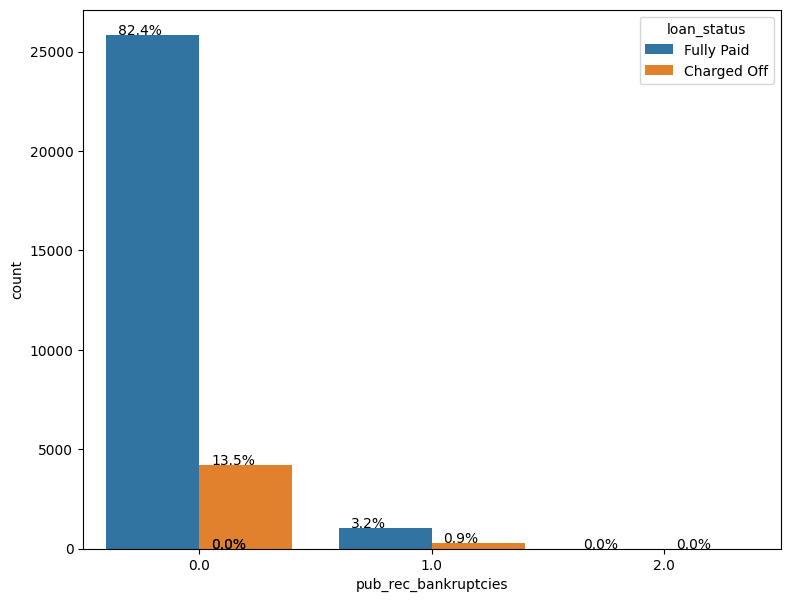

In [71]:
# Overall ratio of Charge Offs against the total
series_plot(imp_data, 'pub_rec_bankruptcies', 'loan_status')

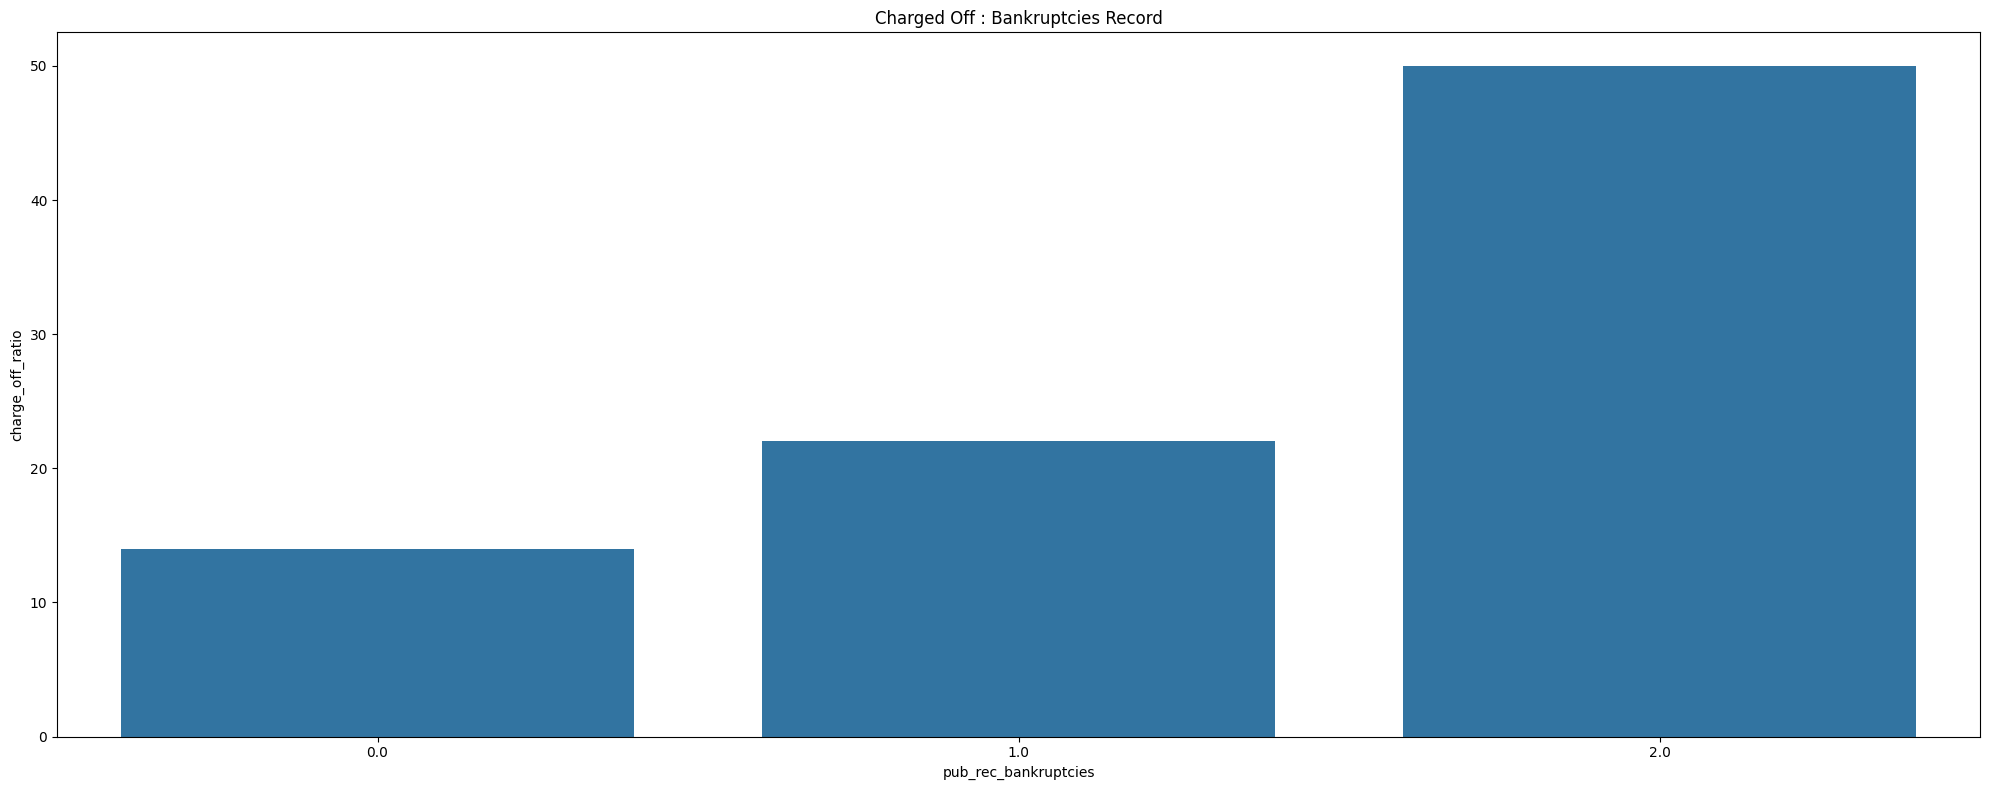

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,total,charge_off_ratio
0,0.0,4223,25818,30041,14.0
1,1.0,279,1015,1294,22.0
2,2.0,2,2,4,50.0


In [72]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(imp_data, 'pub_rec_bankruptcies')

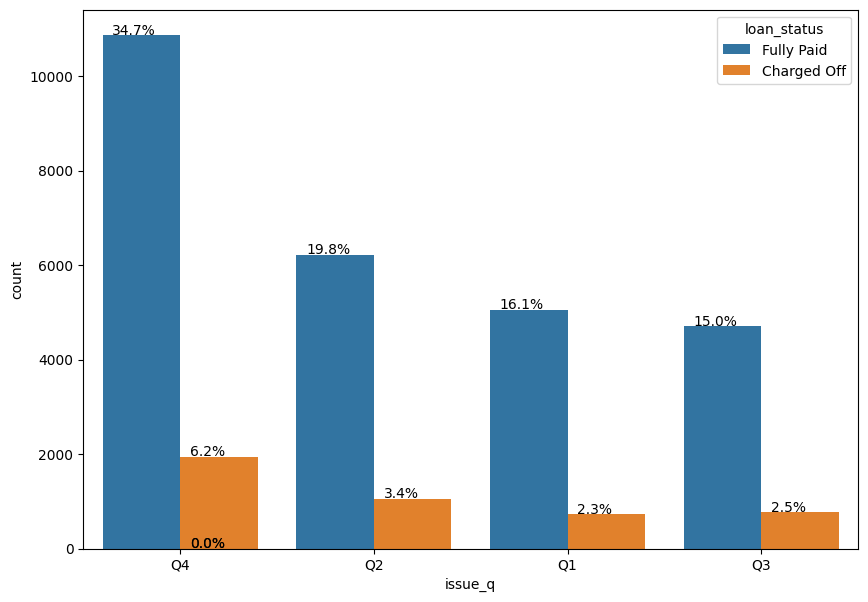

In [73]:
# Overall ratio of Charge Offs against the total
series_plot(imp_data, 'issue_q', 'loan_status')

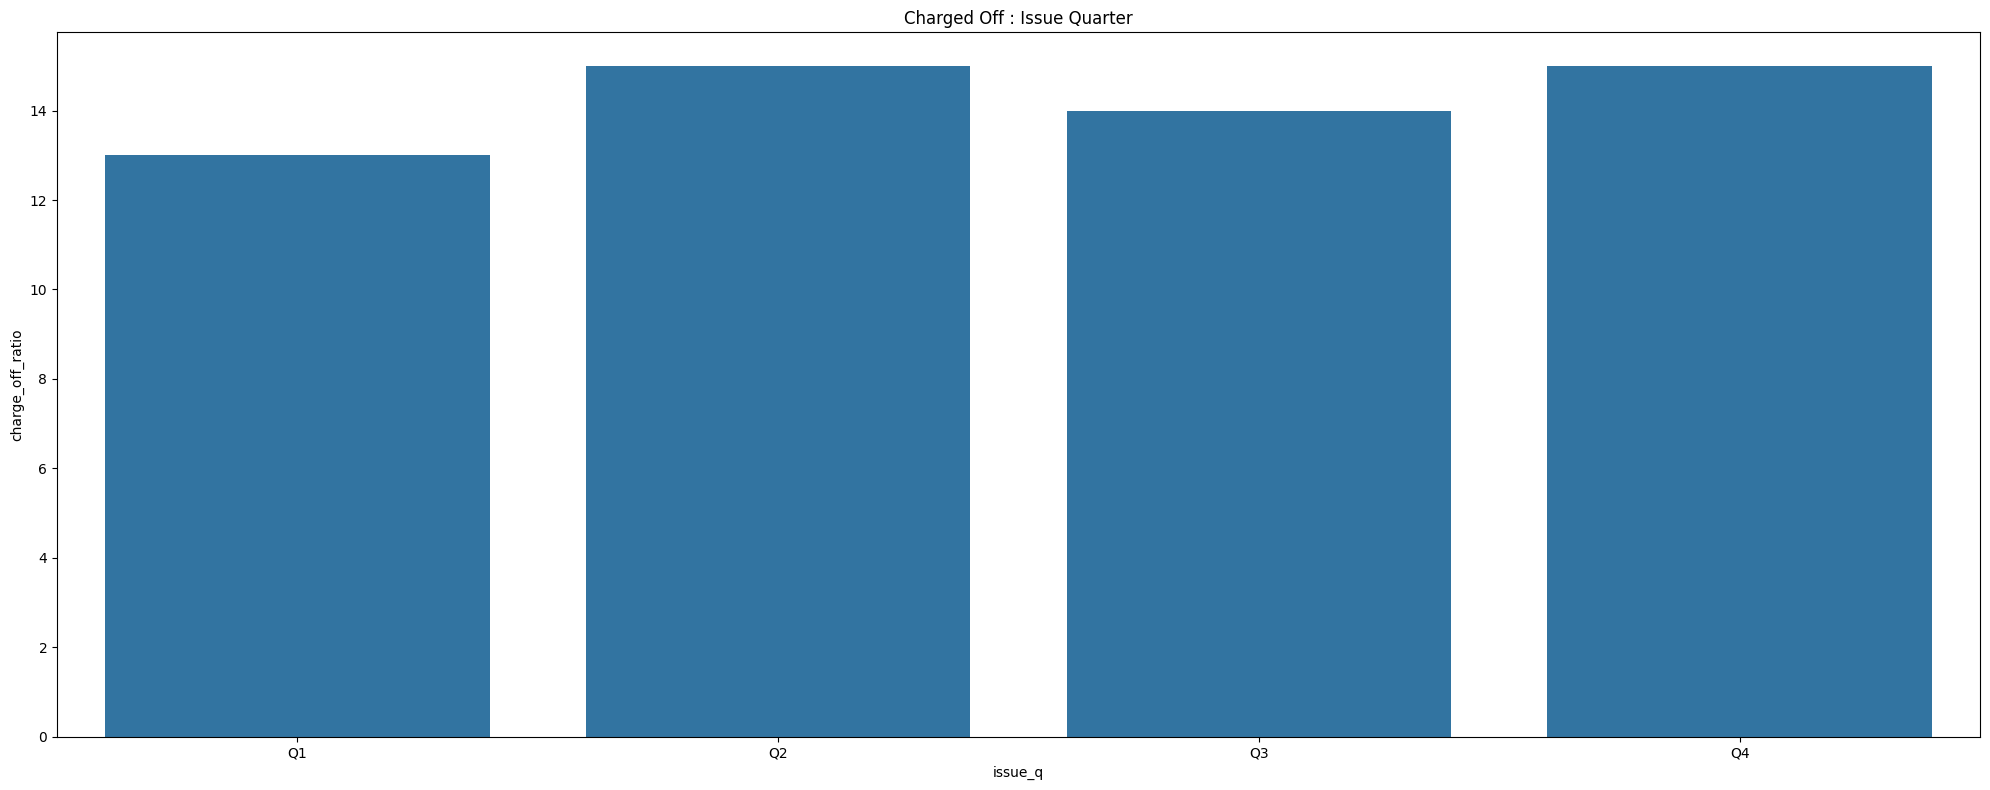

loan_status,issue_q,Charged Off,Fully Paid,total,charge_off_ratio
0,Q1,731,5052,5783,13.0
1,Q2,1059,6218,7277,15.0
2,Q3,770,4702,5472,14.0
3,Q4,1944,10863,12807,15.0


In [74]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(imp_data, 'issue_q')

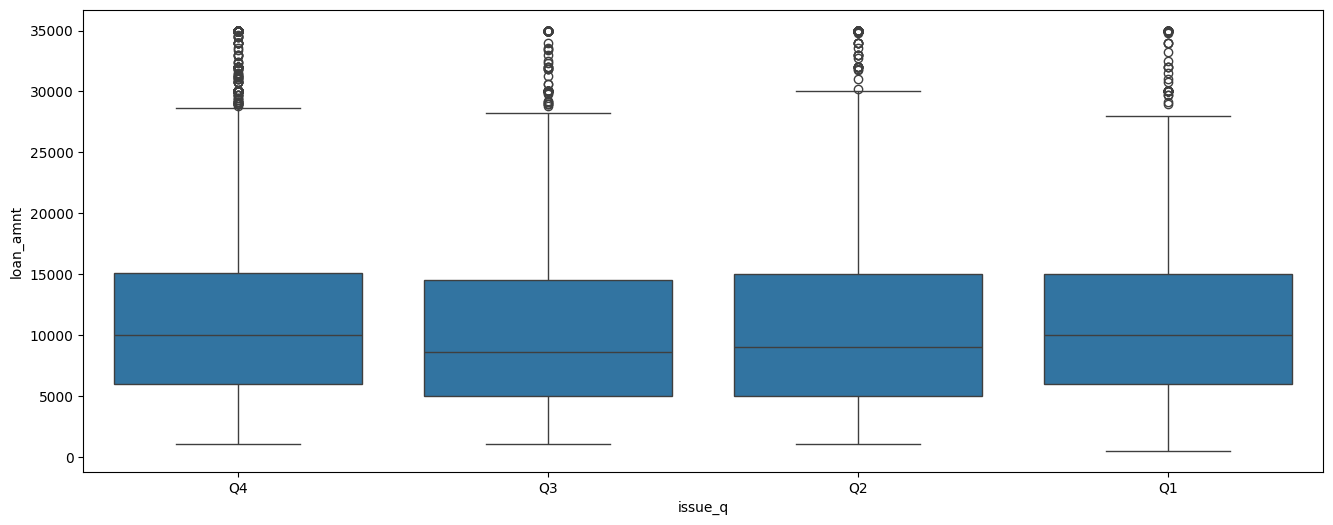

In [75]:
plt.figure(figsize=(16,6))
sn.boxplot(y=imp_data.loan_amnt,x=imp_data.issue_q)
plt.show()

***
- Quarter 2 and 4 has the highest ratio of Charge Offs
- Year has no significant impact as apart from volume increasing year over year, which is impacting charge offs
- 2007 has the maximum Charge Offs. Any current loan running, which started in 2007 may have risk
- **Inferences**
    - Q4 of the year has the highest Charge Off's
    - Charge Off's will increase year over year as the loan volume increases
***

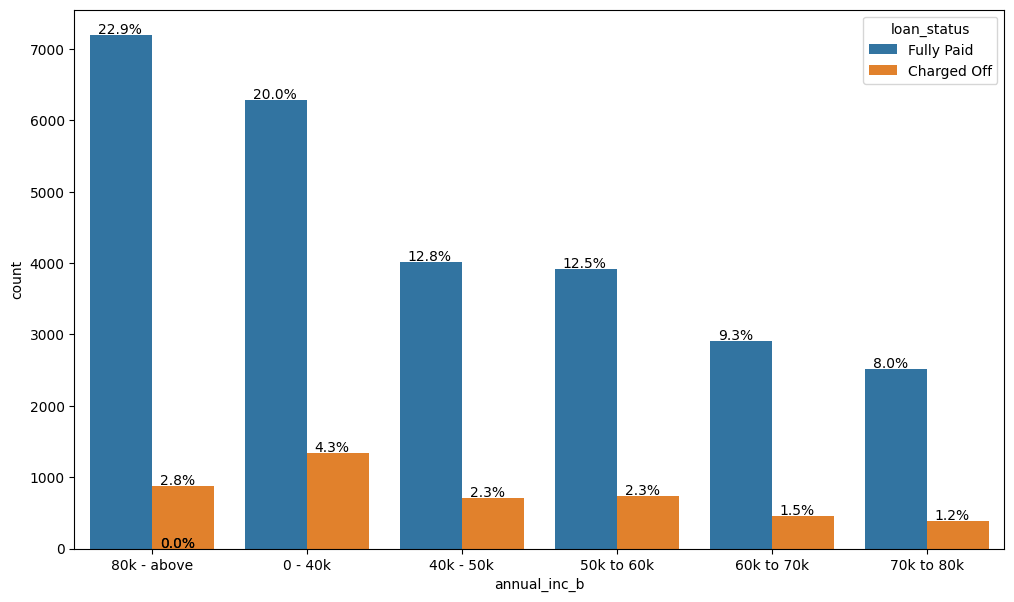

In [76]:
# Overall ratio of Charge Offs against the total
series_plot(imp_data, 'annual_inc_b', 'loan_status')

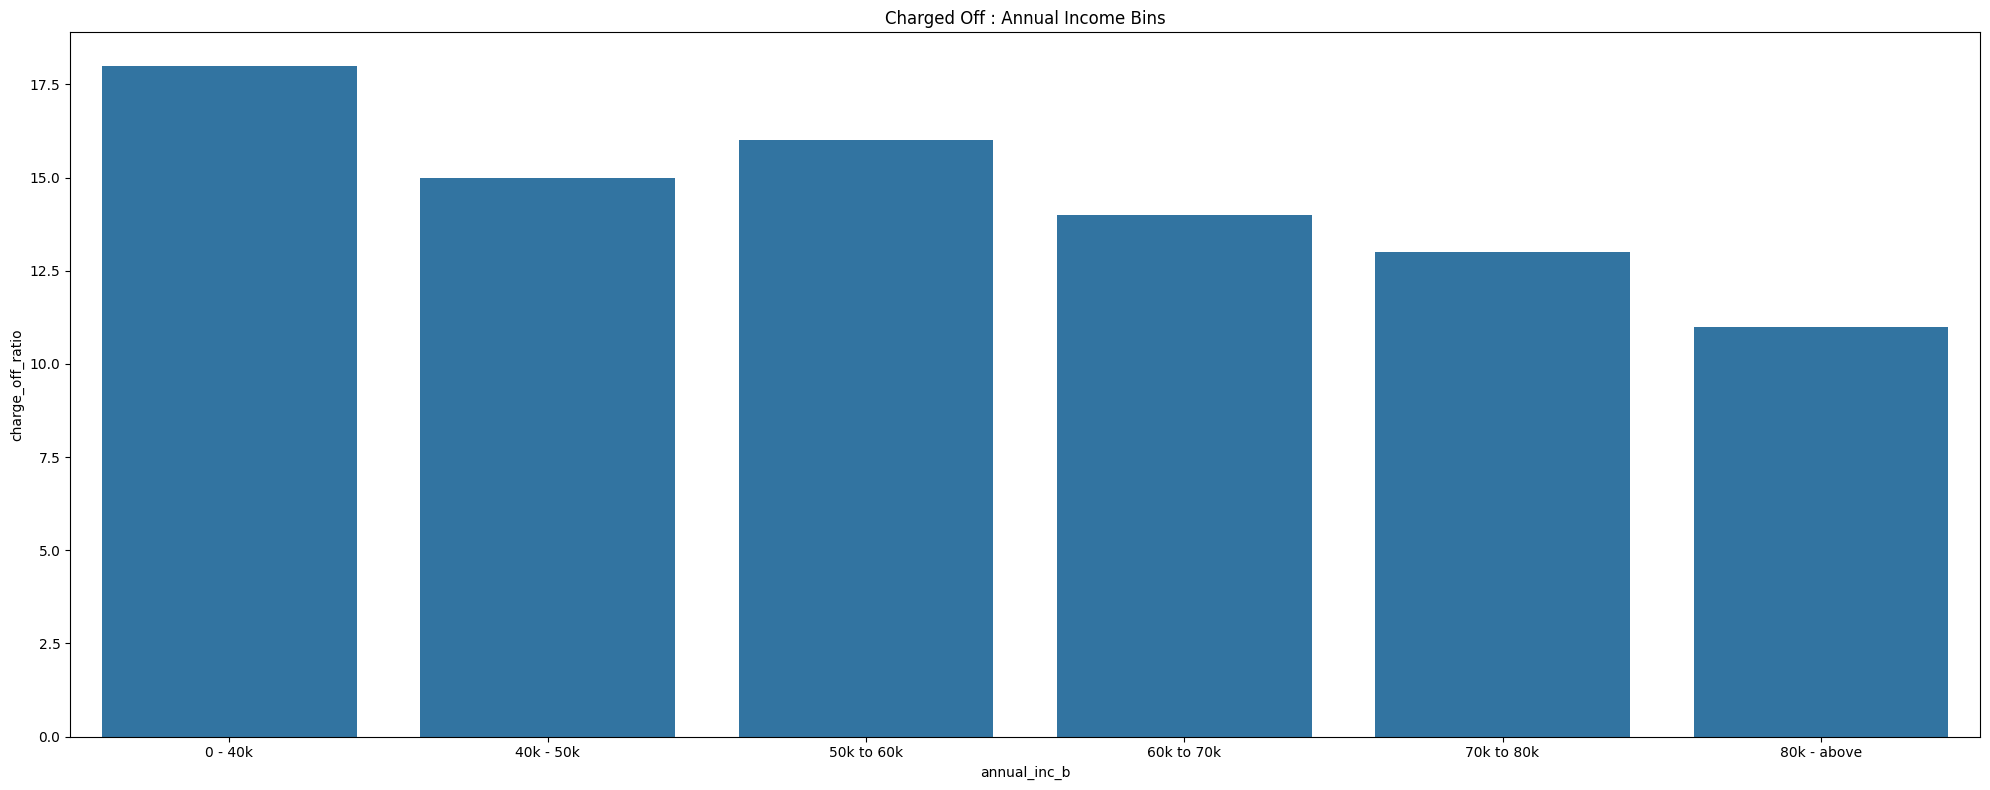

loan_status,annual_inc_b,Charged Off,Fully Paid,total,charge_off_ratio
0,0 - 40k,1343,6279,7622,18.0
1,40k - 50k,710,4018,4728,15.0
2,50k to 60k,730,3921,4651,16.0
3,60k to 70k,455,2910,3365,14.0
4,70k to 80k,385,2517,2902,13.0
5,80k - above,881,7190,8071,11.0


In [77]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(imp_data, 'annual_inc_b')

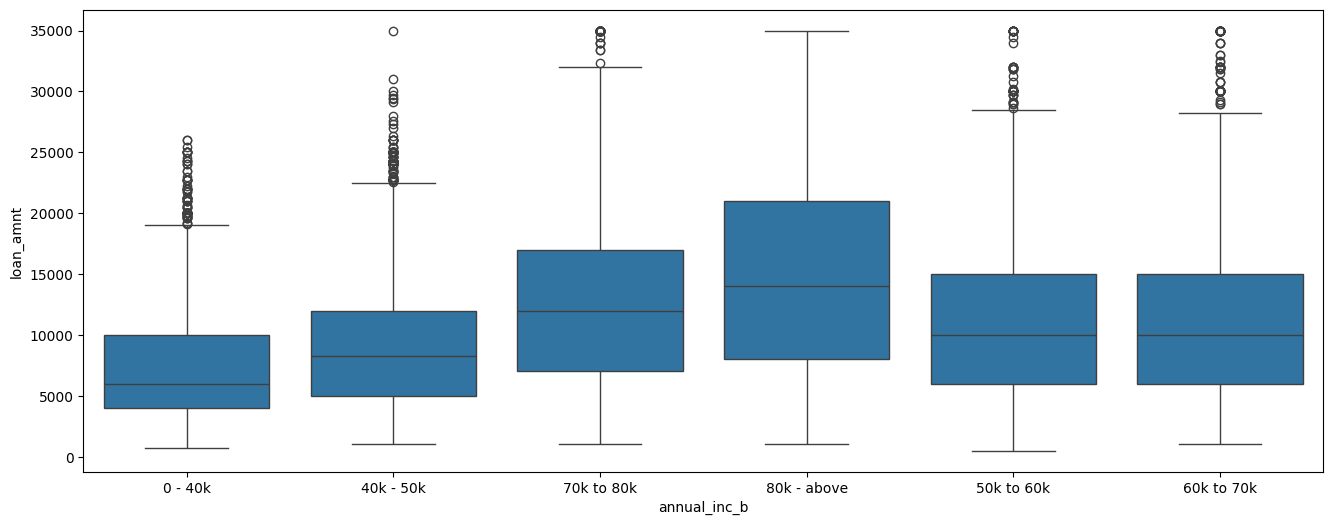

In [78]:
plt.figure(figsize=(16,6))
sn.boxplot(y=imp_data.loan_amnt,x=imp_data.annual_inc_b)
plt.show()

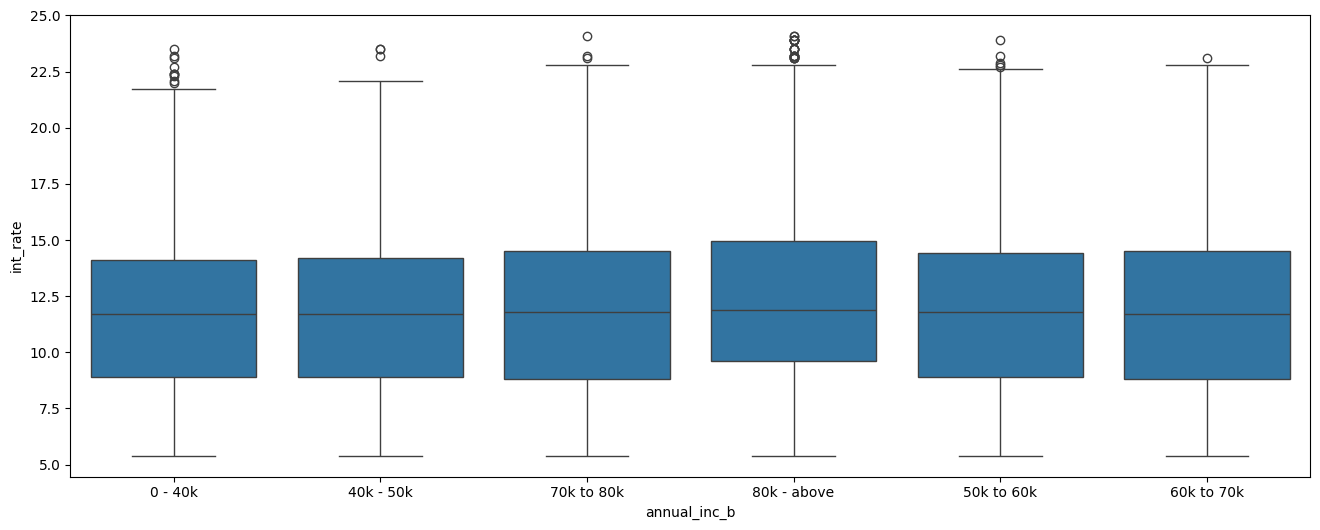

In [79]:
plt.figure(figsize=(16,6))
sn.boxplot(y=imp_data.int_rate,x=imp_data.annual_inc_b)
plt.show()

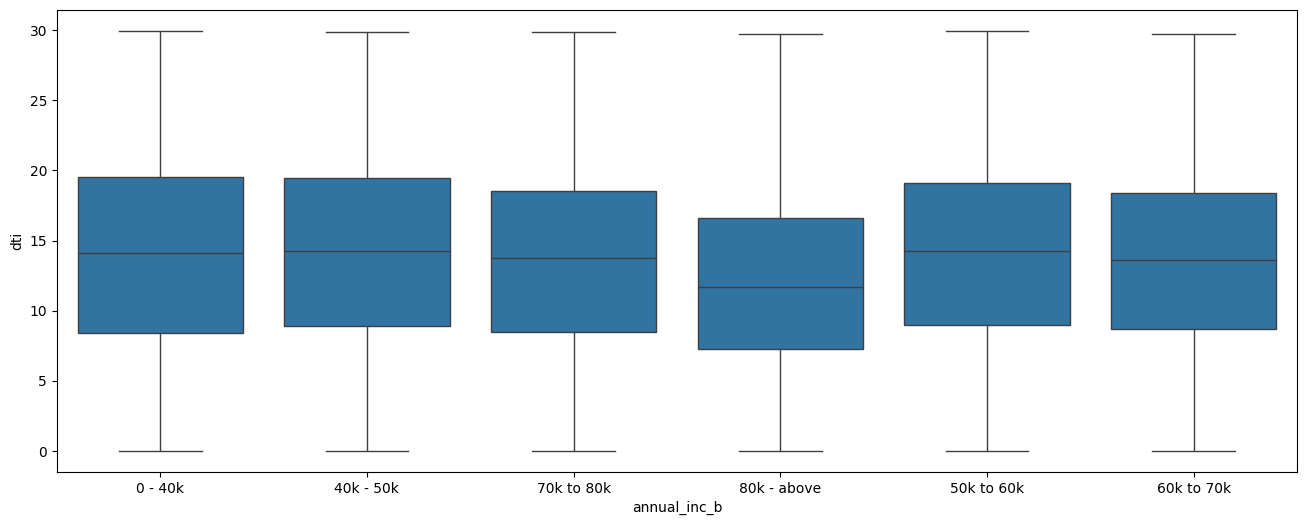

In [80]:
plt.figure(figsize=(16,6))
sn.boxplot(y=imp_data.dti,x=imp_data.annual_inc_b)
plt.show()

***
- Annual income range of 0-40K has the highest charge offs
- Charge off ratio within the bucket of 0-40K have highest Charge Offs
- **Inferences**
    - Income range of 0-40K have the highest risk
    - Income range 80000+  has less chances of charged off.
    - Increase in annual income charged off proportion decreases. 
***

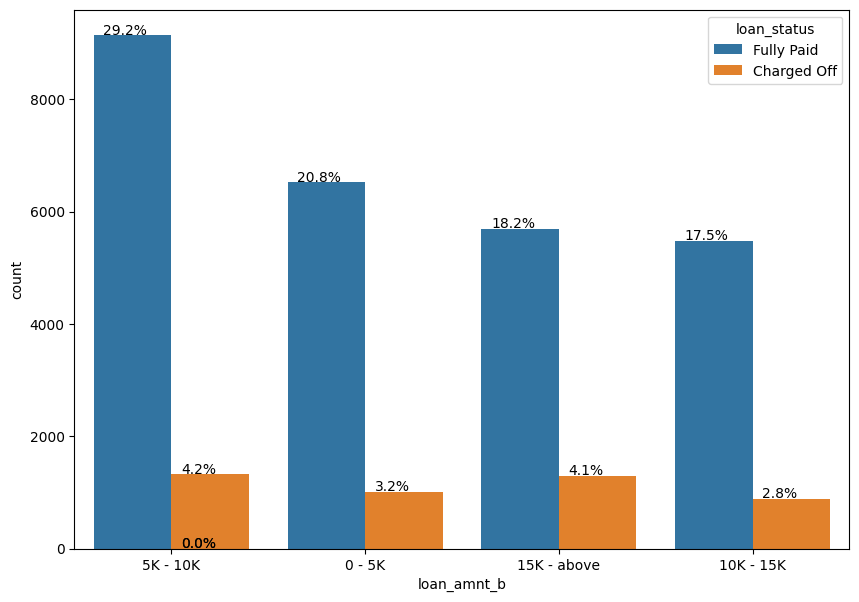

In [81]:
# Overall ratio of Charge Offs against the total
series_plot(imp_data, 'loan_amnt_b', 'loan_status')

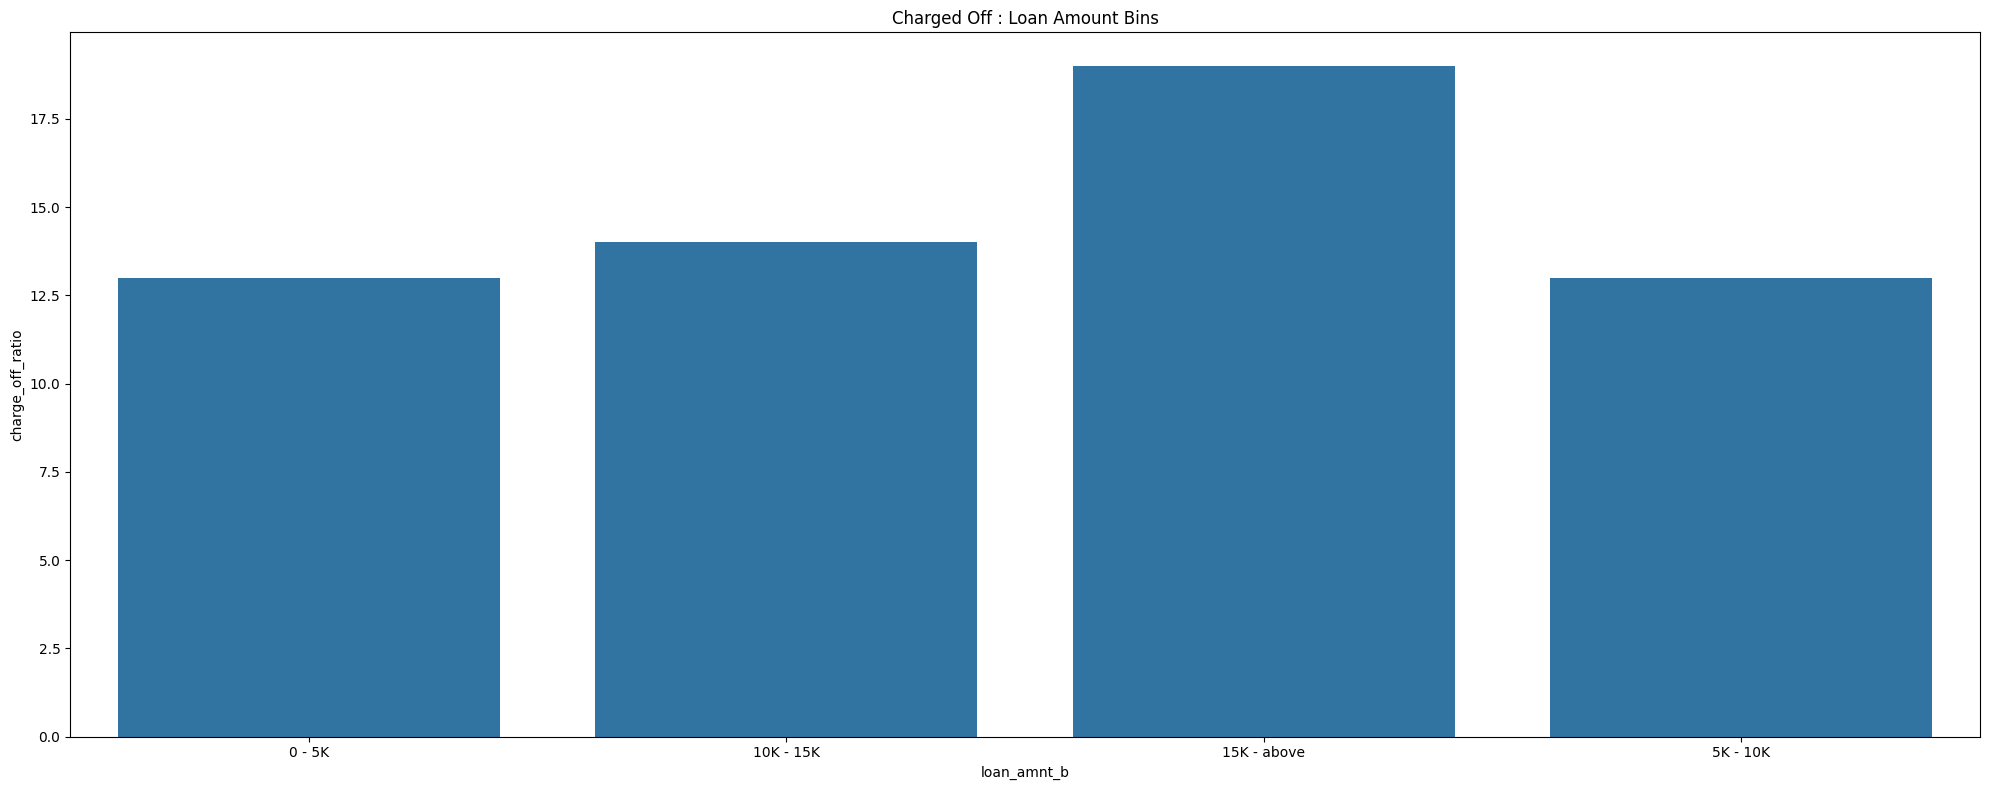

loan_status,loan_amnt_b,Charged Off,Fully Paid,total,charge_off_ratio
0,0 - 5K,1008,6522,7530,13.0
1,10K - 15K,880,5483,6363,14.0
2,15K - above,1297,5691,6988,19.0
3,5K - 10K,1319,9139,10458,13.0


In [82]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(imp_data, 'loan_amnt_b')

***
- Based on volume highest percentage of Charge Offs are in the category of 5K to 10k of loan_ammount
- The Charge Off ratio of all the customer;s within the loan_amount of 15K and above is at the highest CHarge Off risk
- **Inferences**
    - Charge Off risk of loan amount 15K and above is at the highest risk
***

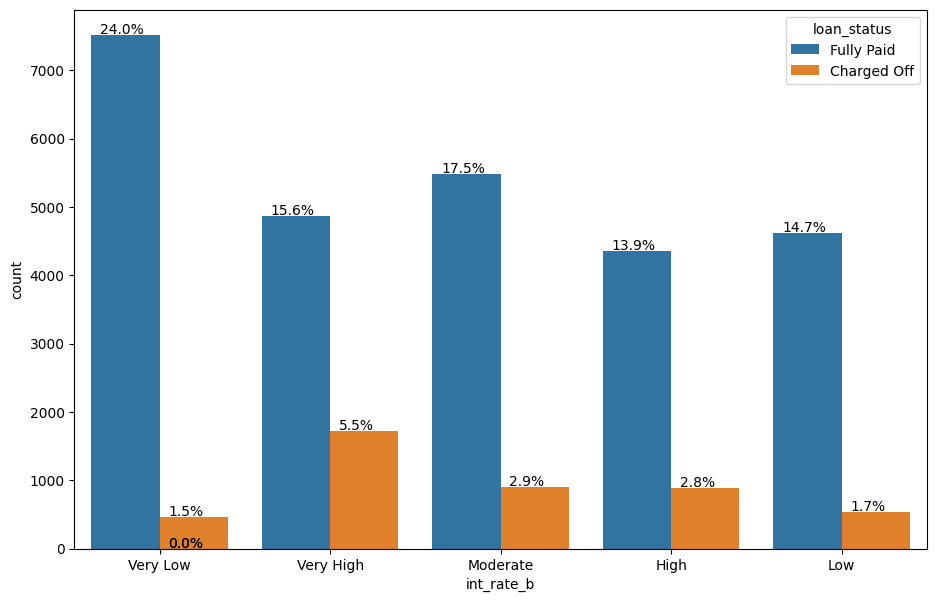

In [83]:
# Overall ratio of Charge Offs against the total
series_plot(imp_data, 'int_rate_b', 'loan_status')

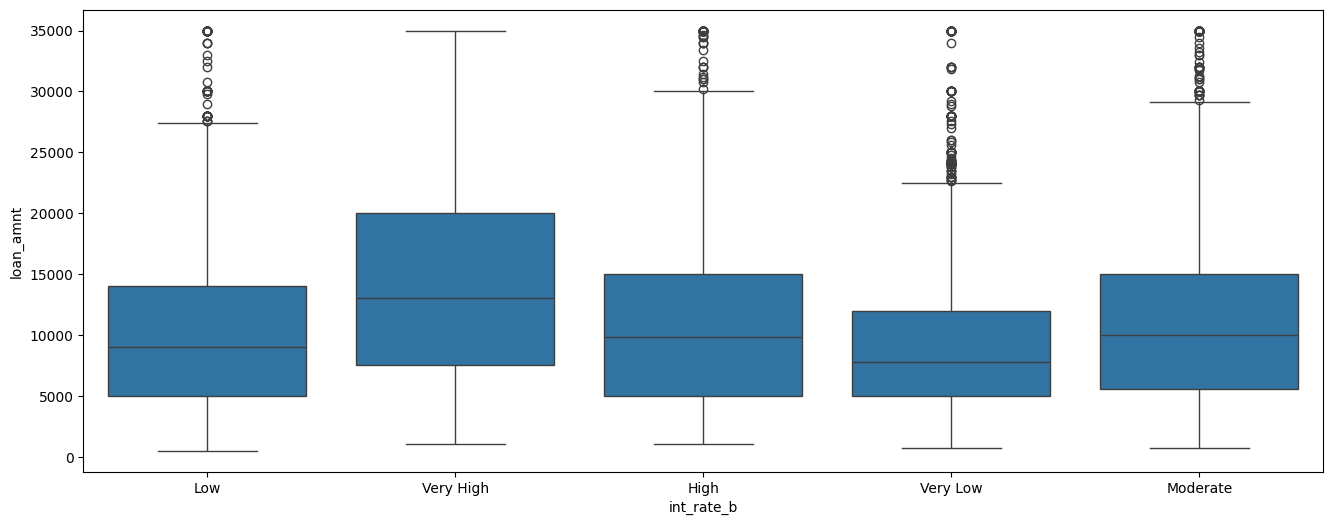

In [84]:
plt.figure(figsize=(16,6))
sn.boxplot(y=imp_data.loan_amnt,x=imp_data.int_rate_b)
plt.show()

***
- Based on volume and based on Charge Off ratio within the category, the Very High interest rates are in risk of Charge Off
- Very High interest rate is 15% and above
***

### Correlation Analysis

In [85]:
imp_data.drop(["member_id","funded_amnt", "funded_amnt_inv","sub_grade","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d"],axis=1,inplace=True)

In [86]:
imp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31339 entries, 0 to 39666
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    31339 non-null  int64         
 1   loan_amnt             31339 non-null  int64         
 2   term                  31339 non-null  int64         
 3   int_rate              31339 non-null  float64       
 4   installment           31339 non-null  float64       
 5   grade                 31339 non-null  object        
 6   emp_length            31339 non-null  float64       
 7   home_ownership        31339 non-null  object        
 8   annual_inc            31339 non-null  float64       
 9   verification_status   31339 non-null  object        
 10  issue_d               31339 non-null  datetime64[ns]
 11  loan_status           31339 non-null  object        
 12  purpose               31339 non-null  object        
 13  zip_code             

In [87]:
imp_data["issue_d"] = pd.to_datetime(imp_data["issue_d"], format='%b-%y')

In [88]:
imp_data.head(10)

,id,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_month,issue_year,issue_q,dti_b,loan_amnt_b,annual_inc_b,int_rate_b,funded_amnt_b,funded_amnt_inv_b
0,1077501,5000,36,10.6,162.87,B,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0,12,2011,Q4,Very High,0 - 5K,0 - 40k,Low,0 - 5K,0 - 5K
1,1077430,2500,60,15.2,59.83,C,0.0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0,12,2011,Q4,Very Low,0 - 5K,0 - 40k,Very High,0 - 5K,0 - 5K
3,1076863,10000,36,13.4,339.31,C,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0,12,2011,Q4,High,5K - 10K,40k - 50k,High,5K - 10K,5K - 10K
5,1075269,5000,36,7.9,156.46,A,3.0,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0,12,2011,Q4,Low,0 - 5K,0 - 40k,Very Low,0 - 5K,0 - 5K
6,1069639,7000,60,15.9,170.08,C,8.0,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,280xx,NC,23.51,0.0,12,2011,Q4,Very High,5K - 10K,40k - 50k,Very High,5K - 10K,5K - 10K
7,1072053,3000,36,18.6,109.43,E,9.0,RENT,48000.0,Source Verified,2011-12-01,Fully Paid,car,900xx,CA,5.35,0.0,12,2011,Q4,Very Low,0 - 5K,40k - 50k,Very High,0 - 5K,0 - 5K
8,1071795,5600,60,21.2,152.39,F,4.0,OWN,40000.0,Source Verified,2011-12-01,Charged Off,small_business,958xx,CA,5.55,0.0,12,2011,Q4,Very Low,5K - 10K,0 - 40k,Very High,5K - 10K,5K - 10K
9,1071570,5375,60,12.6,121.45,B,0.0,RENT,15000.0,Verified,2011-12-01,Charged Off,other,774xx,TX,18.08,0.0,12,2011,Q4,High,5K - 10K,0 - 40k,Moderate,5K - 10K,5K - 10K
10,1070078,6500,60,14.6,153.45,C,5.0,OWN,72000.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,853xx,AZ,16.12,0.0,12,2011,Q4,High,5K - 10K,70k to 80k,High,5K - 10K,5K - 10K
11,1069908,12000,36,12.6,402.54,B,10.0,OWN,75000.0,Source Verified,2011-12-01,Fully Paid,debt_consolidation,913xx,CA,10.78,0.0,12,2011,Q4,Low,10K - 15K,70k to 80k,Moderate,10K - 15K,10K - 15K


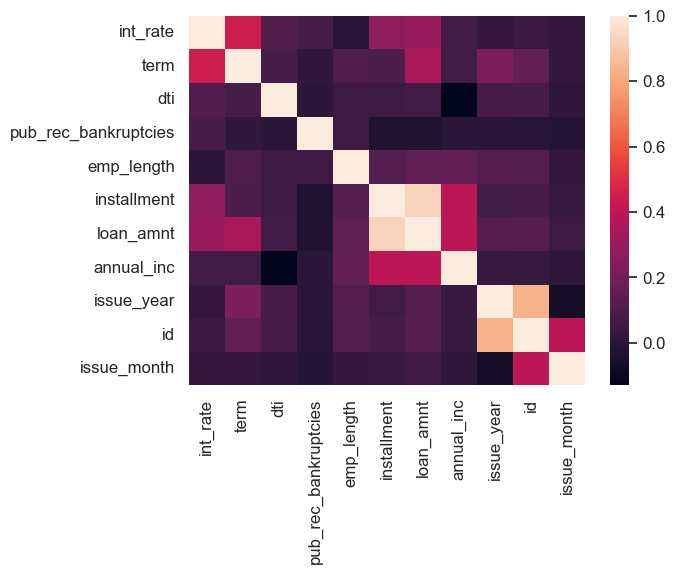

In [89]:
corr_imp = imp_data[["int_rate","term","dti","pub_rec_bankruptcies","emp_length","installment","loan_amnt","annual_inc","issue_year","id","issue_month"]]
corr = corr_imp.corr()
sn.set(font_scale=1.1)
sn.heatmap(corr)
plt.show()

In [91]:
# Data-Cleanning
# Dropping redundant fields related to the 'loan_amnt'. They show high correlation in the corr-matrix
# Dropping fields id which do not contribute to analysis
# Dropping fields issue_y and issue_m
drop_columns = ['installment', 'id', 'issue_year', 'issue_month']
corr_data = corr_imp.drop(columns=drop_columns)

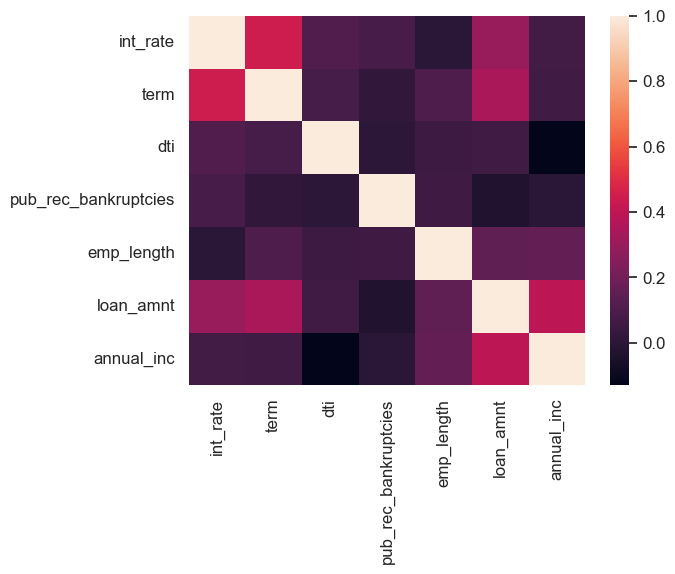

In [92]:
corr = corr_data.corr()
sn.set(font_scale=1.1)
sn.heatmap(corr)
plt.show()

**Negative Correlation**
- loan_amnt has negative correlation with pub_rec_bankrupticies
- annual income has a negative correlation with dti

**Strong Correlation**
- term has a strong correlation with loan amount
- term has a strong correlation with interest rate
- annual income has a strong correlation with loan_amount

**Weak Correlation**
- pub_rec_bankruptcies has weak correlation with most of the fields

<Axes: xlabel='term', ylabel='loan_amnt'>

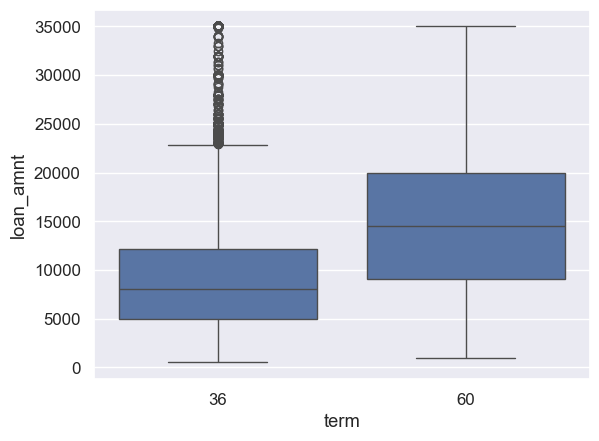

In [94]:
sn.boxplot(x = 'term', y = 'loan_amnt', data=corr_data)

<Axes: xlabel='term', ylabel='int_rate'>

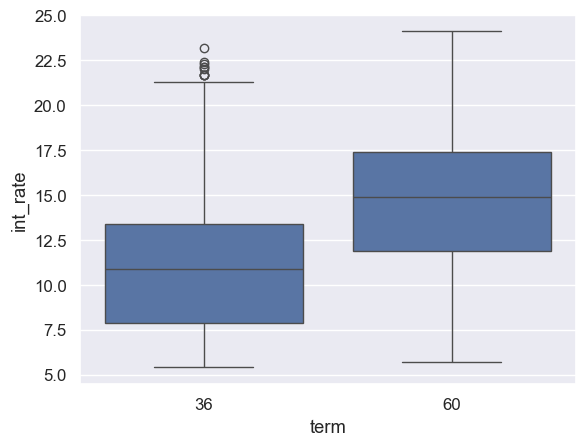

In [95]:
sn.boxplot(x = 'term', y = 'int_rate', data=corr_data)

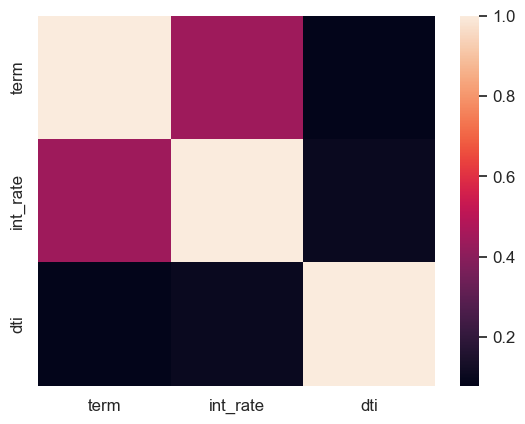

In [98]:
corr = corr_data.loc[:, [ 'term', 'int_rate', 'dti']].corr()
sn.set(font_scale=1.1)
sn.heatmap(corr)
plt.show()

<Figure size 600x1000 with 0 Axes>

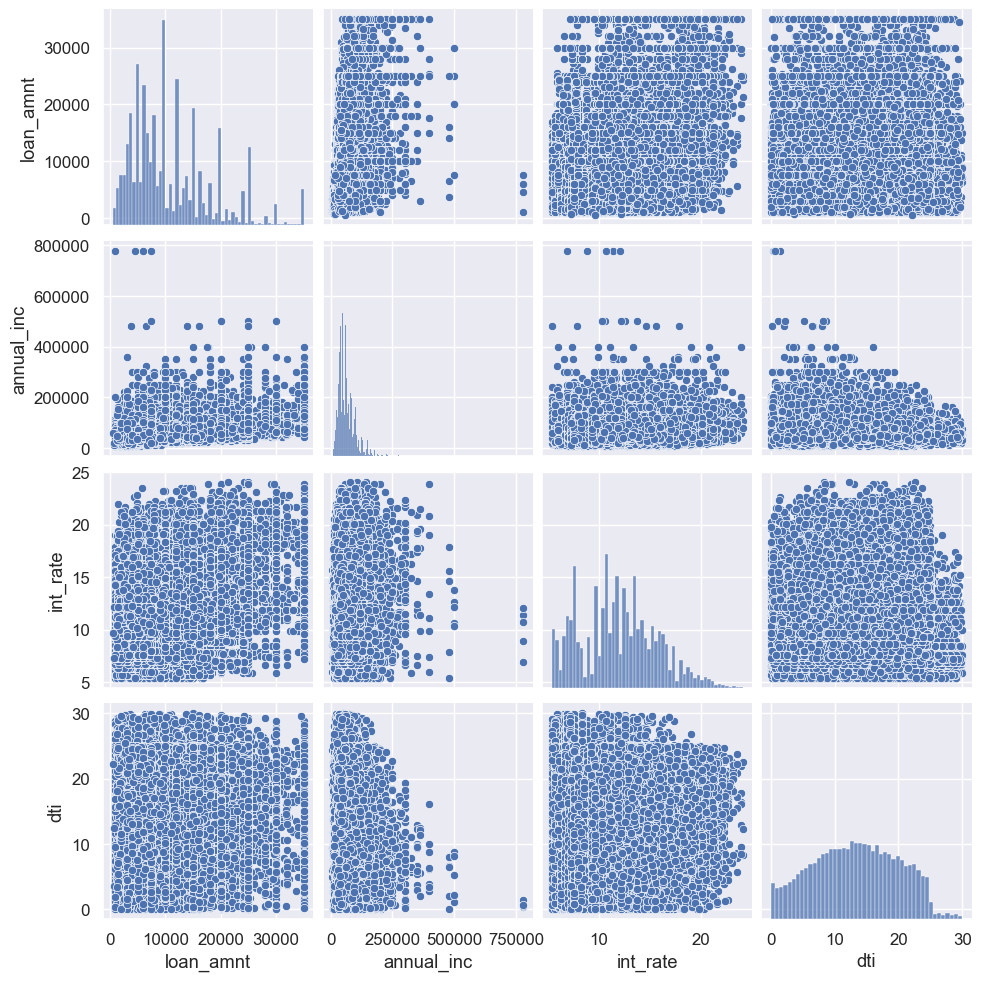

In [102]:
plt.figure(figsize=(6,10))
sn.pairplot(imp_data[['loan_amnt', 'annual_inc', 'int_rate', 'dti']])
plt.show()